# **_Exploratory Data analysis - Case Study_**


### Analysis of the the Cameroon's National football team from 1960 - 2022.


The Cameroon national football team (French: équipe du Cameroun de football), also known as the Indomitable Lions (French: les lions indomptables), represents Cameroon in men's international football. It is controlled by the Fédération Camerounaise de Football, a member of FIFA and its African confederation CAF.


## **Description**


The dataset used for this project can be found on [kaggle.com](kaggle.com). This dataset includes results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

results.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

shootouts.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- winner - winner of the penalty-shootout

goalscorers.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- team - name of the team scoring the goal
- scorer - name of the player scoring the goal
- own_goal - whether the goal was an own-goal
- penalty - whether the goal was a penalty


## **Objective**


In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016. Below the steps taken to achieve the objective.


### **Outline:**

1. [Import Libraries](#first-bullet)
2. [Load Datasets](#second-bullet)
3. [Understand Datasets](#third-bullet)
4. [Data Processing](#fourth-bullet)
5. [Exploratory Analysis](#fifth-bullet)


# **Import Libraries** <a class="anchor" id="first-bullet"></a>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import shutil
import os

%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

# **Load dataset** <a class="anchor" id="second-bullet"></a>


In [3]:
# shutil.rmtree("E:/Documents/Dev/Python/data analysis/Kaggle/archive/international-football-results-from-1872-to-2017")
url = "https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017"
od.download(url)

Skipping, found downloaded files in ".\international-football-results-from-1872-to-2017" (use force=True to force download)


In [4]:
results = pd.read_csv(
    "./international-football-results-from-1872-to-2017/results.csv")
shootouts = pd.read_csv(
    "./international-football-results-from-1872-to-2017/shootouts.csv")


In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


The first five interantional football matches where played by Scotland and England from the early to mid 1870s.


In [6]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


The first penalty shoot-out happened during a friendly match between Inda and Tawai in 1967 with Taiwan winning the match. For more about the history of penalty shoot-outs click [here](<https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football)>).


# **Understand the dataset** <a class="anchor" id="third-bullet"></a>


#### **_Results_**


In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
 6   city        44353 non-null  object
 7   country     44353 non-null  object
 8   neutral     44353 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [8]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       547 non-null    object
 1   home_team  547 non-null    object
 2   away_team  547 non-null    object
 3   winner     547 non-null    object
dtypes: object(4)
memory usage: 17.2+ KB


The results dataframe has 44353 rows and 9 columns while the shootouts dataframe has 547 rows and 4 columns. Neither of the dataframes have missing values so we can move on.


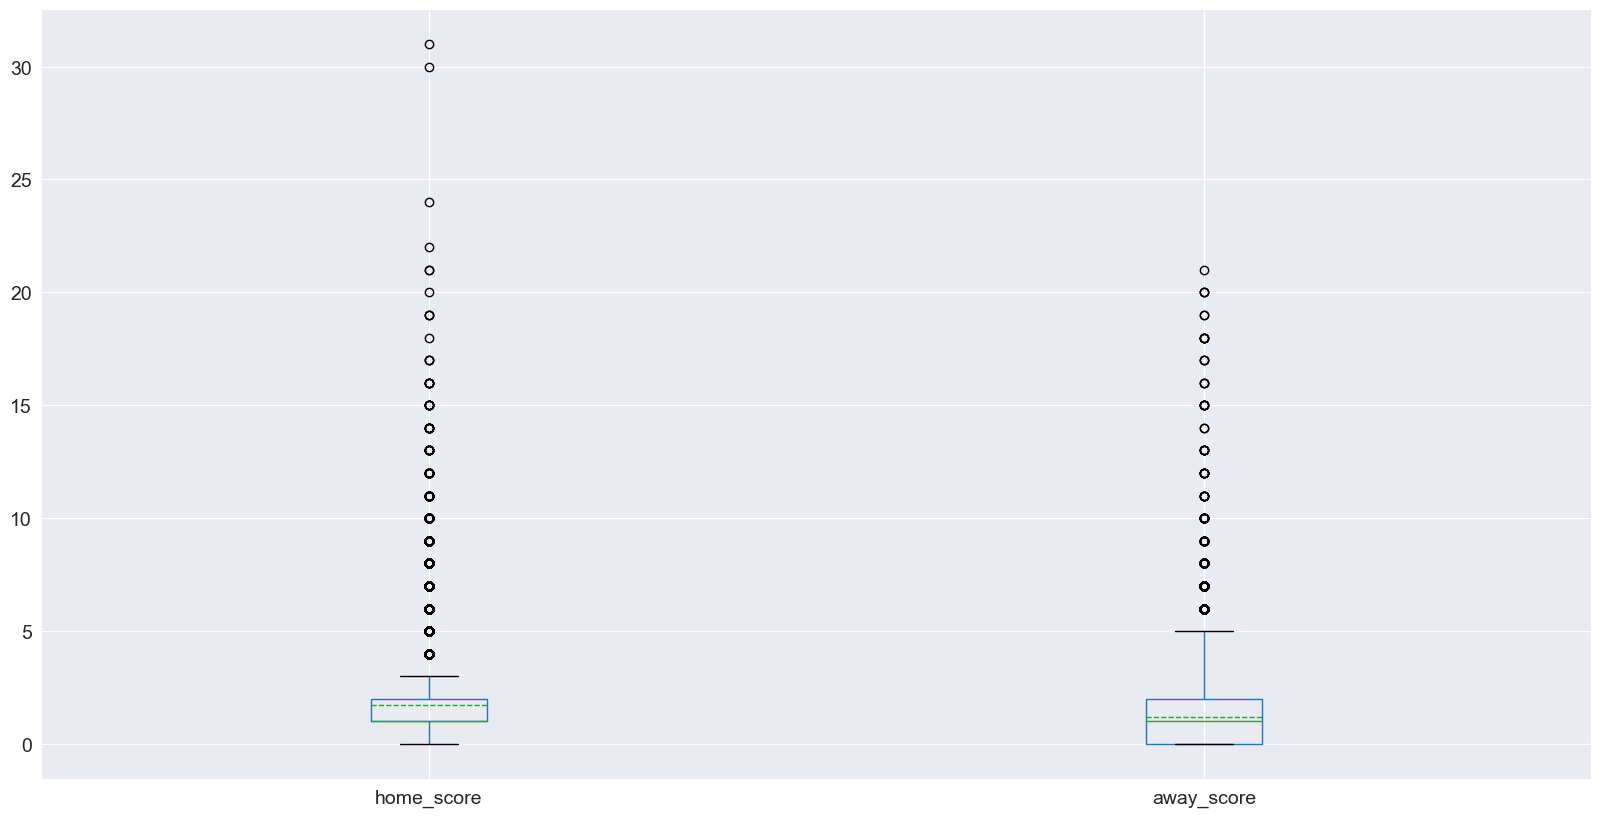

In [9]:
results[["home_score", "away_score"]].boxplot(showmeans=True, meanline=True)


Teams that play at home score more goals on average (shown by the doted line in the box).<br/>
There was a game where the home team scored 31 goals and another where the away team scored 21 although it sees silly it actually happened. Before we go any further, let's check which games we are talking about.


In [10]:
results[(results["home_score"] == 31) | (results["away_score"] == 21)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
27753,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


**Australia vs American Samoa**<br/>
On 11 April 2001, the Australian and American Samoan national association football teams played each other in an Oceanian qualifying match for the 2002 FIFA World Cup. The match was played at the International Sports Stadium in Coffs Harbour, Australia. Australia set a world record for the largest victory in an international football match, winning the game 31–0.


# **Data Processing** <a class="anchor" id="fourth-bullet"></a>


### **Renaming Columns**


First rename columns for plotting purpose


In [11]:
def rename(table: pd.DataFrame, axis: str):
    "automates the process of renaming data frame columns or columns" ""
    action = {"columns": table.columns, "rows": table.index}

    if axis.lower() in action:
        for col in action.get(axis, table.columns):
            l = [w.capitalize() for w in col.split("_")]
            table.rename(columns={col: " ".join(l)}, inplace=True)


rename(results, "columns")
rename(shootouts, "columns")

In [12]:
results.sample(5)

,Date,Home Team,Away Team,Home Score,Away Score,Tournament,City,Country,Neutral
29409,2007-03-24,El Salvador,Honduras,0,2,Friendly,Fort Lauderdale,United States,True
10531,1977-10-09,Mexico,Haiti,4,1,CONCACAF Championship,Mexico City,Mexico,False
30797,2008-06-22,Ghana,Gabon,2,0,FIFA World Cup qualification,Accra,Ghana,False
12276,1981-10-21,Puerto Rico,Saint Vincent and the Grenadines,0,2,CFU Caribbean Cup,San Juan,Puerto Rico,False
18317,1993-09-08,Norway,United States,1,0,Friendly,Oslo,Norway,False


## **Merging Results to shootouts**


Merge results dataframe to shootouts dataframe to get the winner of matches that ended with penalty shootouts.


In [13]:
results = results.merge(shootouts,
                        on=["Date", "Home Team", "Away Team"],
                        how="left")


## **Adding New columns**


We will create columns with outcome of the match, the winner, the loser and total goals scored during the match to get faster access to the resutls. In addition we will add some time related columns and a column to show weither a match ended with penalty kicks.


In [14]:
# results.rename(columns={"Winner": "Shootouts"}, inplace=True)
results["Shootouts"] = results["Winner"].apply(lambda x: x is not np.nan)

In [15]:
results["Outcome"] = results.apply(
    lambda x: "H" if x["Home Score"] > x["Away Score"] else
    ("A" if x["Home Score"] < x["Away Score"] else "D"),
    axis=1)

results["Winner"] = results.apply(
    lambda x: x["Winner"] if x["Winner"] is not np.nan else
    (x["Home Team"] if x["Home Score"] > x["Away Score"] else
     (x["Away Team"] if x["Home Score"] < x["Away Score"] else np.nan)),
    axis=1)

results["Loser"] = results.apply(
    lambda x: np.nan if x["Winner"] is np.nan else
    (x["Home Team"] if x["Winner"] == x["Away Team"] else x["Away Team"]),
    axis=1)

results["Date"] = pd.to_datetime(results.Date)

results["Year"] = results.Date.dt.year

results["Decade"] = results.Year.apply(lambda x: x - int(str(x)[-1]))

results["Month"] = results.Date.dt.month

results["Day"] = results.Date.dt.day

results["Match Month"] = results.Date.dt.month_name(locale='English')

results["Week Day"] = results.Date.dt.day_name(locale="English")

results = results[[
    'Date', 'Home Team', 'Home Score', 'Away Score', 'Away Team', 'Tournament',
    'City', 'Country', 'Neutral', 'Shootouts', 'Outcome', 'Winner', 'Loser',
    'Year', 'Decade', 'Month', 'Day', "Match Month", 'Week Day'
]]

results.head(5)

,Date,Home Team,Home Score,Away Score,Away Team,Tournament,City,Country,Neutral,Shootouts,Outcome,Winner,Loser,Year,Decade,Month,Day,Match Month,Week Day
0,1872-11-30,Scotland,0,0,England,Friendly,Glasgow,Scotland,False,False,D,NaN,NaN,1872,1870,11,30,November,Saturday
1,1873-03-08,England,4,2,Scotland,Friendly,London,England,False,False,H,England,Scotland,1873,1870,3,8,March,Saturday
2,1874-03-07,Scotland,2,1,England,Friendly,Glasgow,Scotland,False,False,H,Scotland,England,1874,1870,3,7,March,Saturday
3,1875-03-06,England,2,2,Scotland,Friendly,London,England,False,False,D,NaN,NaN,1875,1870,3,6,March,Saturday
4,1876-03-04,Scotland,3,0,England,Friendly,Glasgow,Scotland,False,False,H,Scotland,England,1876,1870,3,4,March,Saturday


### **Creating dataframes for FWC, AFCON, Cameroon results and goals**


We will create 4 new dataframes from the results df. The first to only show results from FIFA World CUps, the second for African Cup of Nations results and the last for Cameroon's national team's results.


In [16]:
fwc = results[results.Tournament == "FIFA World Cup"]
afcon = results[results.Tournament == "African Cup of Nations"]
cm_results = results[(results["Home Team"] == "Cameroon") |
                     (results["Away Team"] == "Cameroon")]

ls = [fwc, afcon, cm_results]
for l in ls:
    l.reset_index(inplace=True, drop=True)


Since we are dealing with one team, rather than using home and away scores, we need the to know the number of goals scored and conceded by the team. For that, we will create a new dataframe called goals df with columns for goals scored, goals conceded, goal difference, home/away, outcome, year and decade. The dataframe will be indexed by the day the match was played


In [17]:
goals_scored = cm_results.apply(lambda x: x["Home Score"]
                                if x["Home Team"] == "Cameroon" else
                                (x["Away Score"]
                                 if x["Away Team"] == "Cameroon" else ""),
                                axis=1)

goals_conceded = cm_results.apply(lambda x: x["Home Score"]
                                  if x["Home Team"] != "Cameroon" else
                                  (x["Away Score"]
                                   if x["Away Team"] != "Cameroon" else ""),
                                  axis=1)

goals_df = pd.concat([goals_scored, goals_conceded],
                     axis=1,
                     keys=["Goals Scored", "Goals Conceded"])
goals_df[
    'Goal Difference'] = goals_df["Goals Scored"] - goals_df["Goals Conceded"]
goals_df["Opponent"] = cm_results.apply(
    lambda x: x["Home Team"]
    if x["Home Team"] != "Cameroon" else x["Away Team"],
    axis=1)

goals_df["Tournament"] = cm_results.apply(
    lambda x: x["Tournament"]
    if x["Home Team"] == "Cameroon" or x["Away Team"] == "Cameroon" else "",
    axis=1)

goals_df["Home/Away"] = cm_results.apply(
    lambda x: "Home" if x["Home Team"] == "Cameroon" else "Away", axis=1)

goals_df["Outcome"] = goals_df["Goal Difference"].apply(
    lambda x: "Won" if x > 0 else ("Lost" if x < 0 else "Draw"))
goals_df.index = cm_results.Date
goals_df["Year"] = goals_df.index.year
goals_df["Decade"] = goals_df.index.year - goals_df.index.year % 10

goals_df.sample(10)

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1976-10-31,1,2,-1,Congo,FIFA World Cup qualification,Home,Lost,1976,1970
2015-06-06,3,2,1,Burkina Faso,Friendly,Away,Won,2015,2010
1994-11-30,0,1,-1,Ghana,Simba Tournament,Home,Lost,1994,1990
1974-12-29,1,1,0,Guinea,Friendly,Home,Draw,1974,1970
2007-08-22,0,2,-2,Japan,Friendly,Away,Lost,2007,2000
1983-05-29,0,4,-4,Egypt,Friendly,Away,Lost,1983,1980
2014-06-01,2,2,0,Germany,Friendly,Away,Draw,2014,2010
1993-07-04,0,1,-1,Zimbabwe,FIFA World Cup qualification,Away,Lost,1993,1990
1985-03-29,0,2,-2,Egypt,Friendly,Away,Lost,1985,1980


Everything seems to be ok.


# </br>**Exploratory Analysis**<a class="anchor" id="fifth-bullet"></a>


### **First Match After Independence**


In [18]:
goals_df.head(1)

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1960-04-14,9,2,7,Djibouti,Friendly,Home,Won,1960,1960


Cameroon played its first football match in 1960 more precisely on the 14th of April 1960 against Djibouti. The match end with Cameroons victory with a score of 9 against 2.


### **How many matches per years?** <a class="lvl3-anchor" id="2-lvl3-bullet"></a>


Lets take a look at the number of matches the Cameroonian team played per year.


In [19]:
matches_per_year = cm_results[[
    "Year", "Decade"
]].value_counts().reset_index().sort_values(by=["Year"])
matches_per_year.rename(columns={0: "Count"}, inplace=True)

In [20]:
world_cup_years = cm_results[cm_results['Tournament'] ==
                             'FIFA World Cup']['Year'].unique()
world_cup_years_games = matches_per_year[matches_per_year.Year.isin(
    world_cup_years)]

afcon_years = cm_results[cm_results["Tournament"] ==
                         "African Cup of Nations"]["Year"].unique()
afcon_years_games = matches_per_year[matches_per_year.Year.isin(afcon_years)]

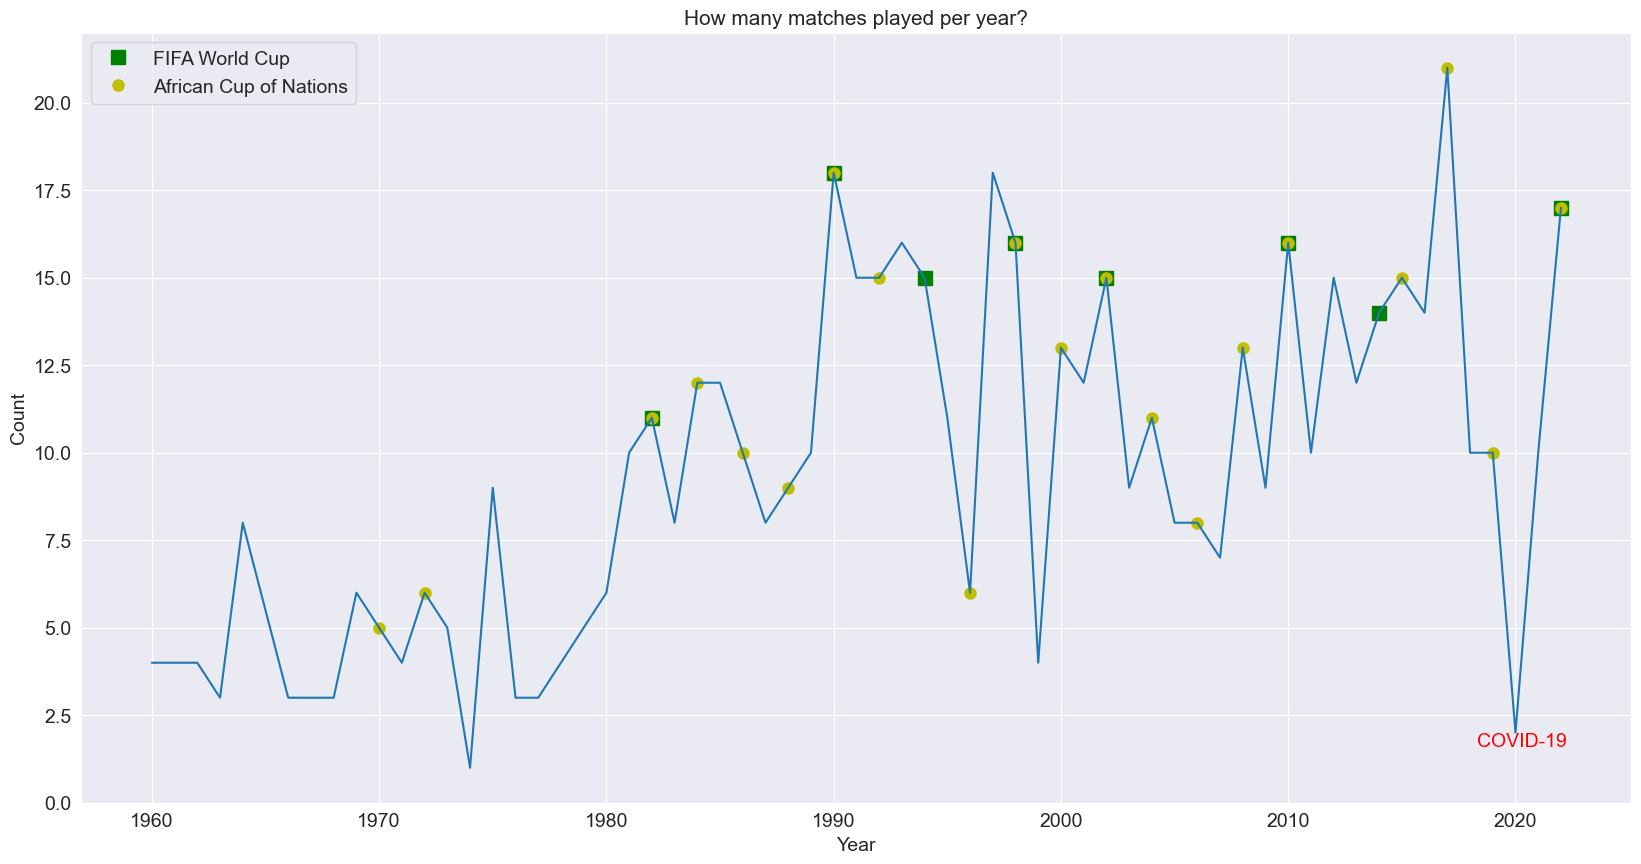

In [21]:
# Shows the years when Cameroon participated at the FIFA World Cup and the African Cup of Nations.
plt.plot("Year",
         "Count",
         "gs",
         data=world_cup_years_games,
         label="FIFA World Cup",
         markersize=10)
plt.plot("Year",
         "Count",
         "yo",
         data=afcon_years_games,
         label="African Cup of Nations",
         markersize=8)

sns.lineplot(data=matches_per_year, x="Year", y="Count")
plt.title("How many matches played per year?", size=15)
plt.text(2018.3, 1.6, "COVID-19", color="r")


Generally the Cameroonina football team played more matches on years where they participated in major tournaments. The overall number of matches played by the Cameroonian team seems to be on the increase since 1980 as more matches were played for major competitions and their qualifying rounds.

In 1974, Cameroon had its lowest match count per year, followed by 2020 with only 2 matches played as result of the African Cup of Nations which was to be hosted by Cameroon getting postoned due to the anglophone crisis in Cameroon.


In [22]:
goals_df.Year.count()

576

In its history since independence, the Cameroonian team has played a total of 576 matches.


### **Analysis related to goals**


Lets take a look at the goals scored by the Cameroonian Team over the years.

> For visibility purpose we grouped the results per decade.


Before plotting we need to extract relevant data from goals_df.


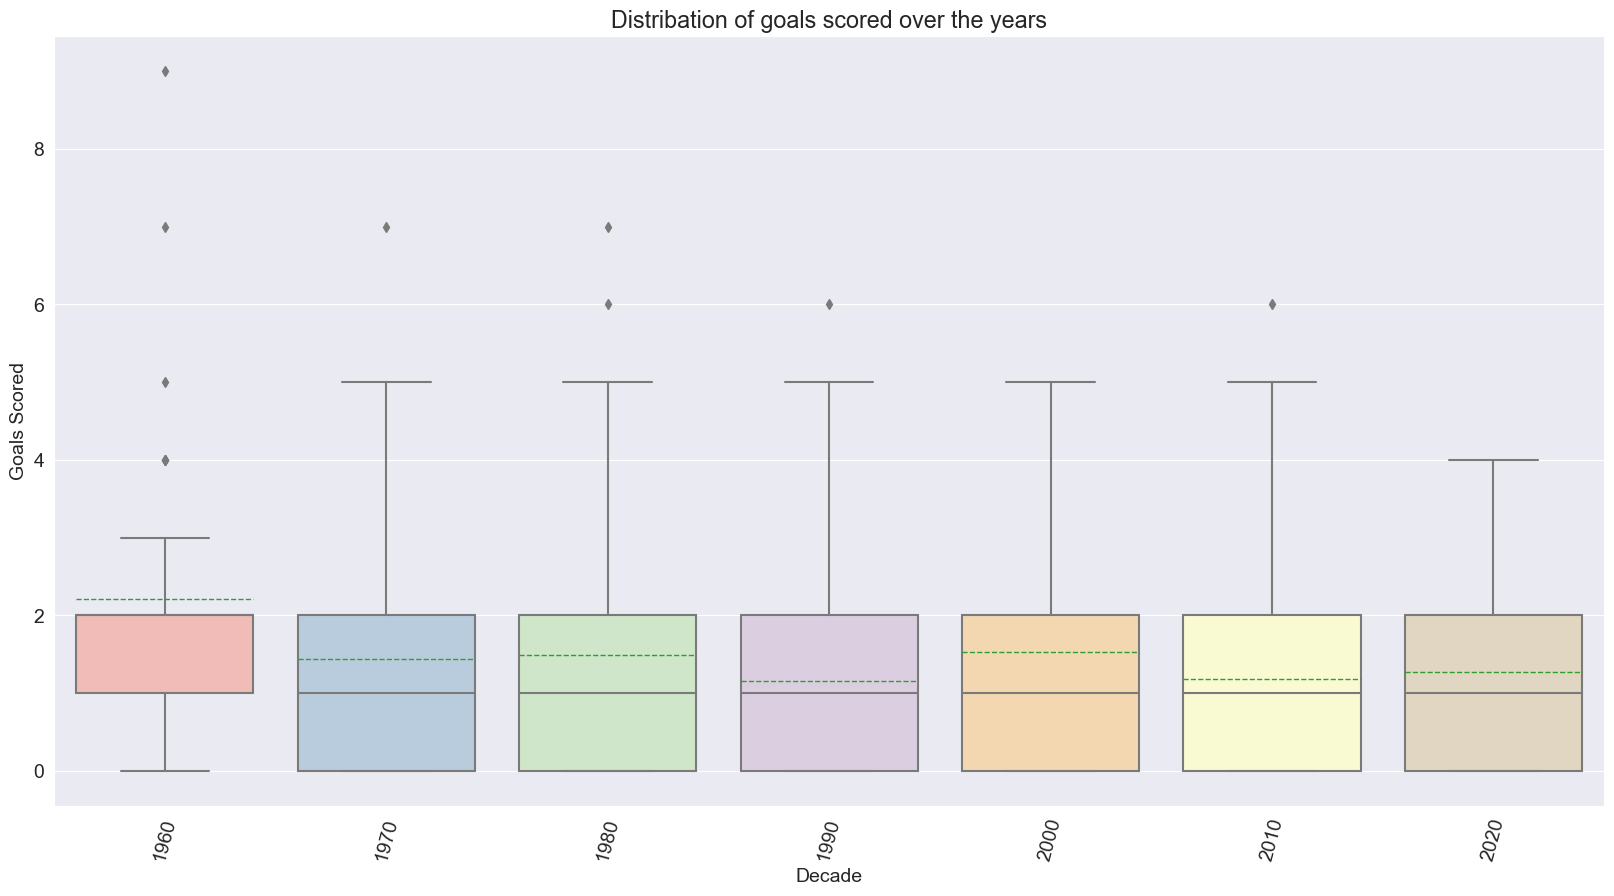

In [23]:
sns.boxplot(data=goals_df,
            x="Decade",
            y="Goals Scored",
            showmeans=True,
            meanline=True,
            palette="Pastel1")
plt.title("Distribation of goals scored over the years")
plt.xticks(rotation=75)


> - Avergae is shown by the doted green line
> - The boxes shows the range for 50% of the data
> - The black line in the boxes represents the median


In the 60s, the goals scored by Cameroon per match ranged mainly betweem 0 to 3, with a few outliers going up to 9. Within this period, they scored on average of 2 goals per match. For 75 percent of the mathces within this period, the Cameroonian team had at least 1 goal.


Starting from the 70s, the range of goals scored by Cameroonian team per match Increased as iranged mainly from 0 to 5. For 75% of matches played per year since 1970, the Cameroonian team had scored a maximum of two goals per match. On average, Cameroon had scored about 1 goal per match since the 70s. Lets check the data on the match with 9 goals from Cameroon.


In [24]:
goals_df[goals_df["Goals Scored"] == goals_df["Goals Scored"].max()]

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1960-04-14,9,2,7,Djibouti,Friendly,Home,Won,1960,1960


The highest number of goals scored by the Cameroonian team was 9 in a friendly match against Djibouti in 1960.


Lets take a look at the goals conceded per match.

> Note: Like the goals scored per match the data is grouped by decade.<a class="3lvl-anchor" id="10-lvl3-bullet"></a>


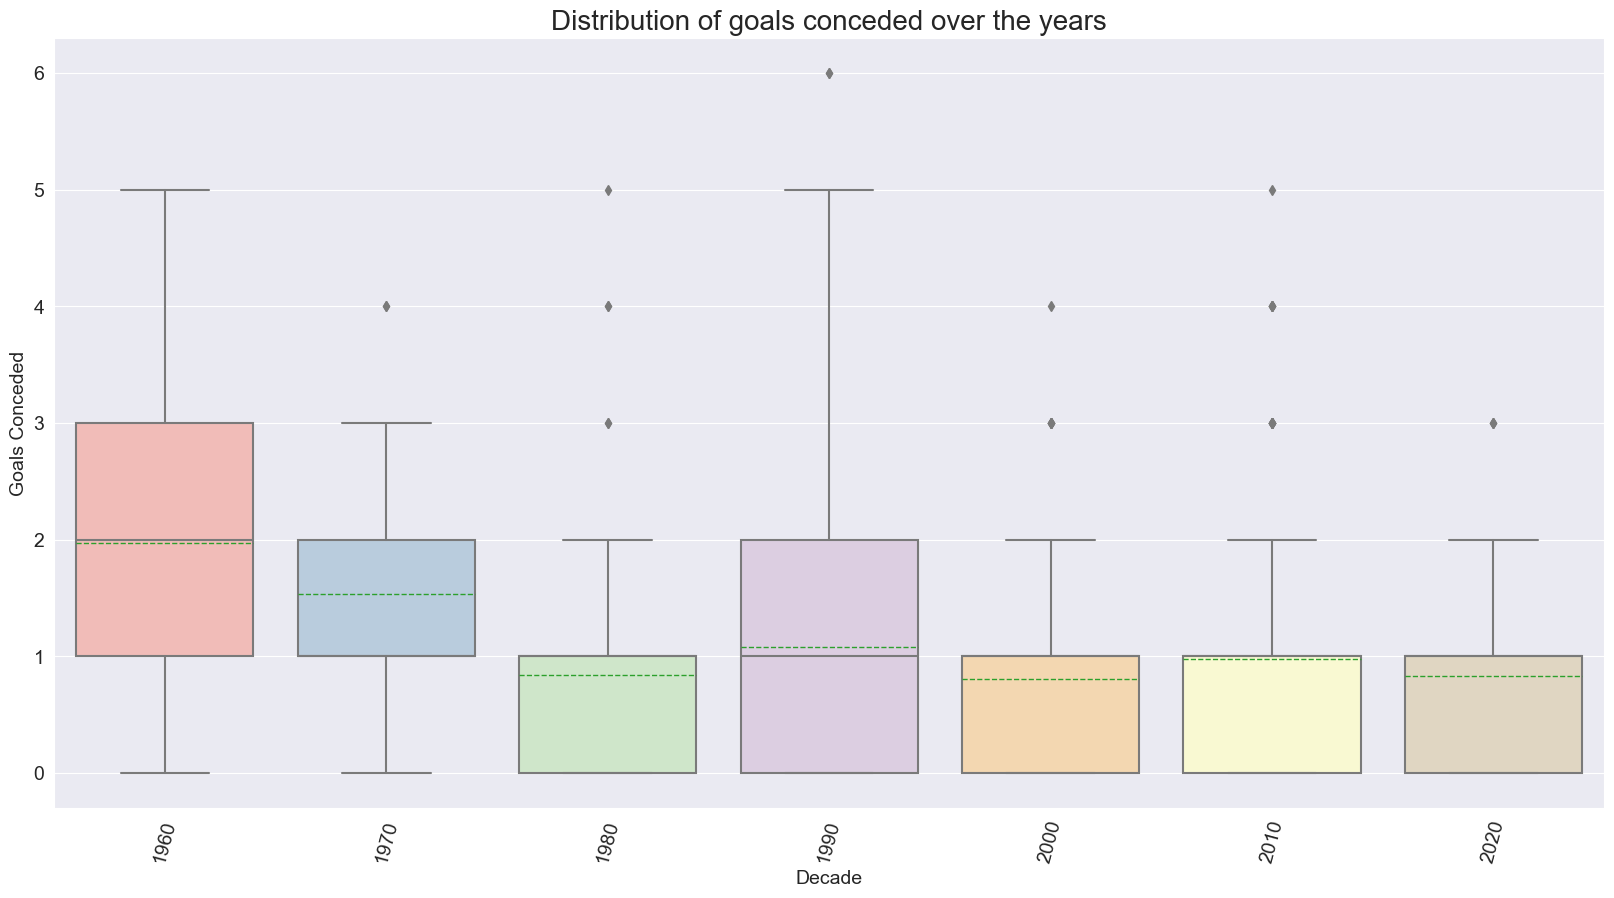

In [25]:
sns.boxplot(data=goals_df,
            y="Goals Conceded",
            x="Decade",
            showmeans=True,
            meanline=True,
            palette="Pastel1")
plt.title("Distribution of goals conceded over the years", size=20)
plt.xticks(rotation=75)


> - Avergae is shown by the doted green line
> - The boxes shows the range for 50% of the data
> - The black line in the boxes represents the median


The cameroon defense seems to have become less lax as the over all number of goals conceded per year is on an increase since the 1980s. Although the number of goals conceded decreased in the 2000s, it increased again in the 2010s and we are yet to see the end of the 2020s.

Over all it seems the Cameroonian team's worst defense came around the 1990s with a mean goals conceded per year standing at around 14 a max of 26 goals, a min of 5 goals and over 50% of the years in 1990s ending with over 13 goals conceded.


In [26]:
goals_df[goals_df["Goals Conceded"] == goals_df["Goals Conceded"].max()]

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1990-10-31,1,6,-5,Norway,Friendly,Away,Lost,1990,1990
1994-06-28,1,6,-5,Russia,FIFA World Cup,Away,Lost,1994,1990


The highest number of goals conceded by Cameroon was 6. This happened twice in the Cameroon football history once in a friendly match against Norway in 1990 and the other in a match against Russia duirng 1994 FIFA World Cup.


### **Match Outcome**<a class="3lvl-anchor" id="14-lvl3-bullet"></a>


Before proceeding, we need to create "Outcome" column for the "goals_df" dataframe to easily determine wether the outcome of a match was win a loss or a draw for the Cameroonian team.


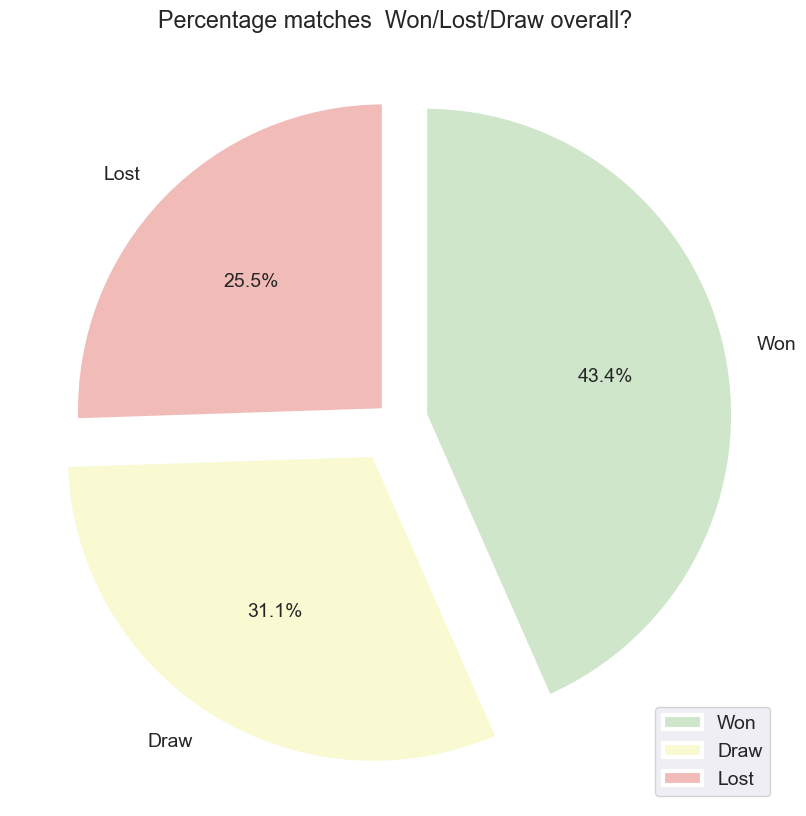

In [27]:
cm_win_loss = goals_df.Outcome.value_counts()
pie_color = ["#cfe6ca", "#f9f9d2", "#f1bcb8"]
explode = [0.1, 0.13, 0.05]
plt.pie(x=cm_win_loss,
        autopct="%1.1f%%",
        startangle=90,
        labels=cm_win_loss.index,
        colors=pie_color,
        wedgeprops={"linewidth": 3},
        counterclock=False,
        explode=explode)

plt.title("Percentage matches  Won/Lost/Draw overall?")
plt.legend(cm_win_loss.index)


In its history the Cameroonian football team has won over 40% of their mathes and lost 25.5% of their matches. This shows that the Cameroonian team has quite a solid team but still has relatively high chances of losing a match.


### **How were match outcomes distributed over the years?** <a class="3lvl-anchor" id="15-lvl3-bullet"></a>


In [28]:
outcomes = goals_df[["Year", "Decade", "Outcome"]]


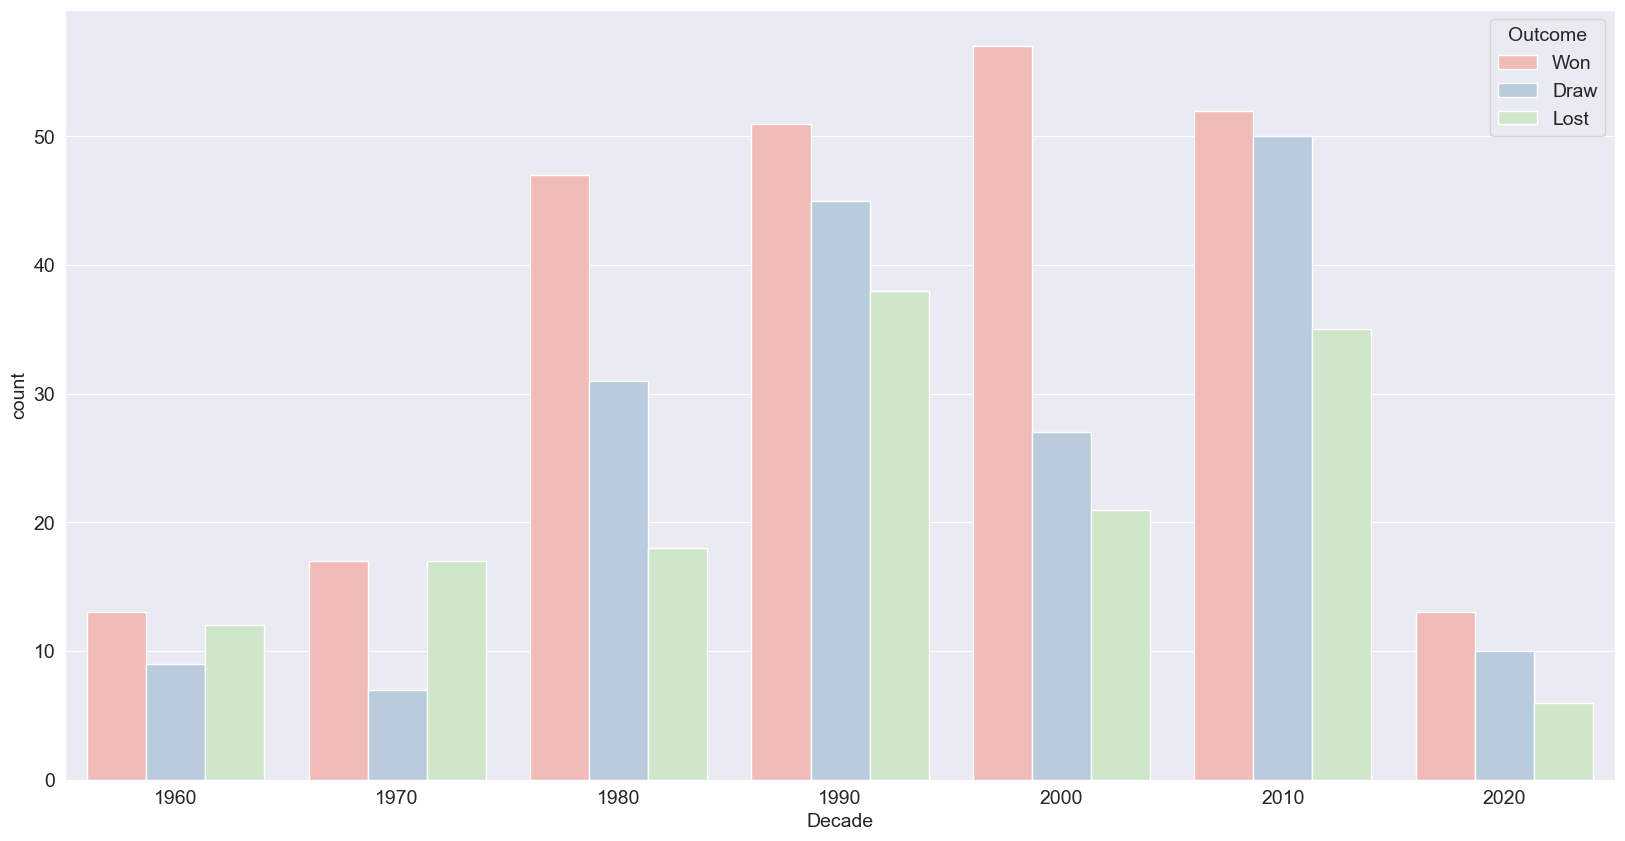

In [29]:
sns.countplot(data=outcomes, x="Decade", hue="Outcome", palette="Pastel1")


Over all the indomitable Lions have come out of most decades with more matches won than they lost. Their best seasosn in terms of match outcome was in the 2000s. Although they played less matches in the 2000s than in the 2010s or the 1990s, the win loss ratio of the 2000s surpases that of other decades.


### **Average Goal Difference per Matches Won**


In [30]:
matches_won = goals_df[goals_df.Outcome == "Won"]
round(matches_won["Goal Difference"].sum() /
      matches_won["Goal Difference"].count())


2

On average Cameroon wins its matches by a difference of around 2 goals.


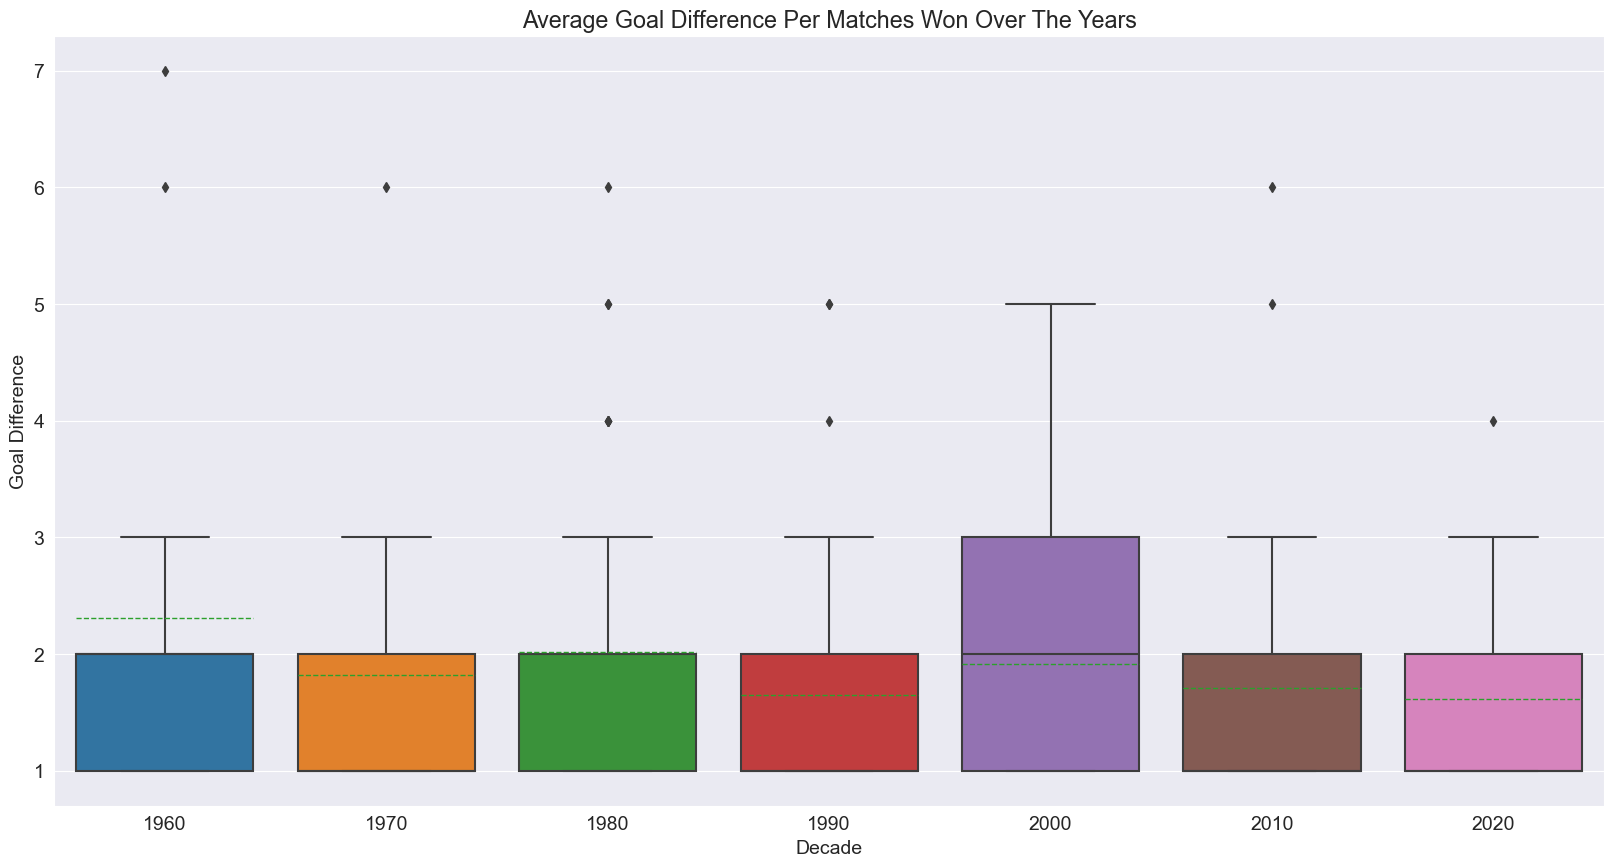

In [31]:
sns.boxplot(x="Decade",
            y="Goal Difference",
            data=matches_won,
            showmeans=True,
            meanline=True)
plt.title("Average Goal Difference Per Matches Won Over The Years")


Although in the 60s and the 80s Cameroon on average won its matches with a difference 2 goals , in last 3 decades, Cameroon has an average goal difference around 1 for each match won.


In [32]:
matches_won[(
    matches_won["Goal Difference"] == matches_won["Goal Difference"].max())]


,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1960-04-14,9,2,7,Djibouti,Friendly,Home,Won,1960,1960


The match with the highest goal difference in Cameroon's history was that against Djibouti in 1960.


### **Average Goal Difference Per Matches Lost**


In [33]:
matches_lost = goals_df[goals_df["Outcome"] == "Lost"]
abs(
    round(matches_lost["Goal Difference"].sum() /
          matches_lost["Goal Difference"].count()))


2

On aveage, Cameroon losses its matches with a difference of 2 goals.


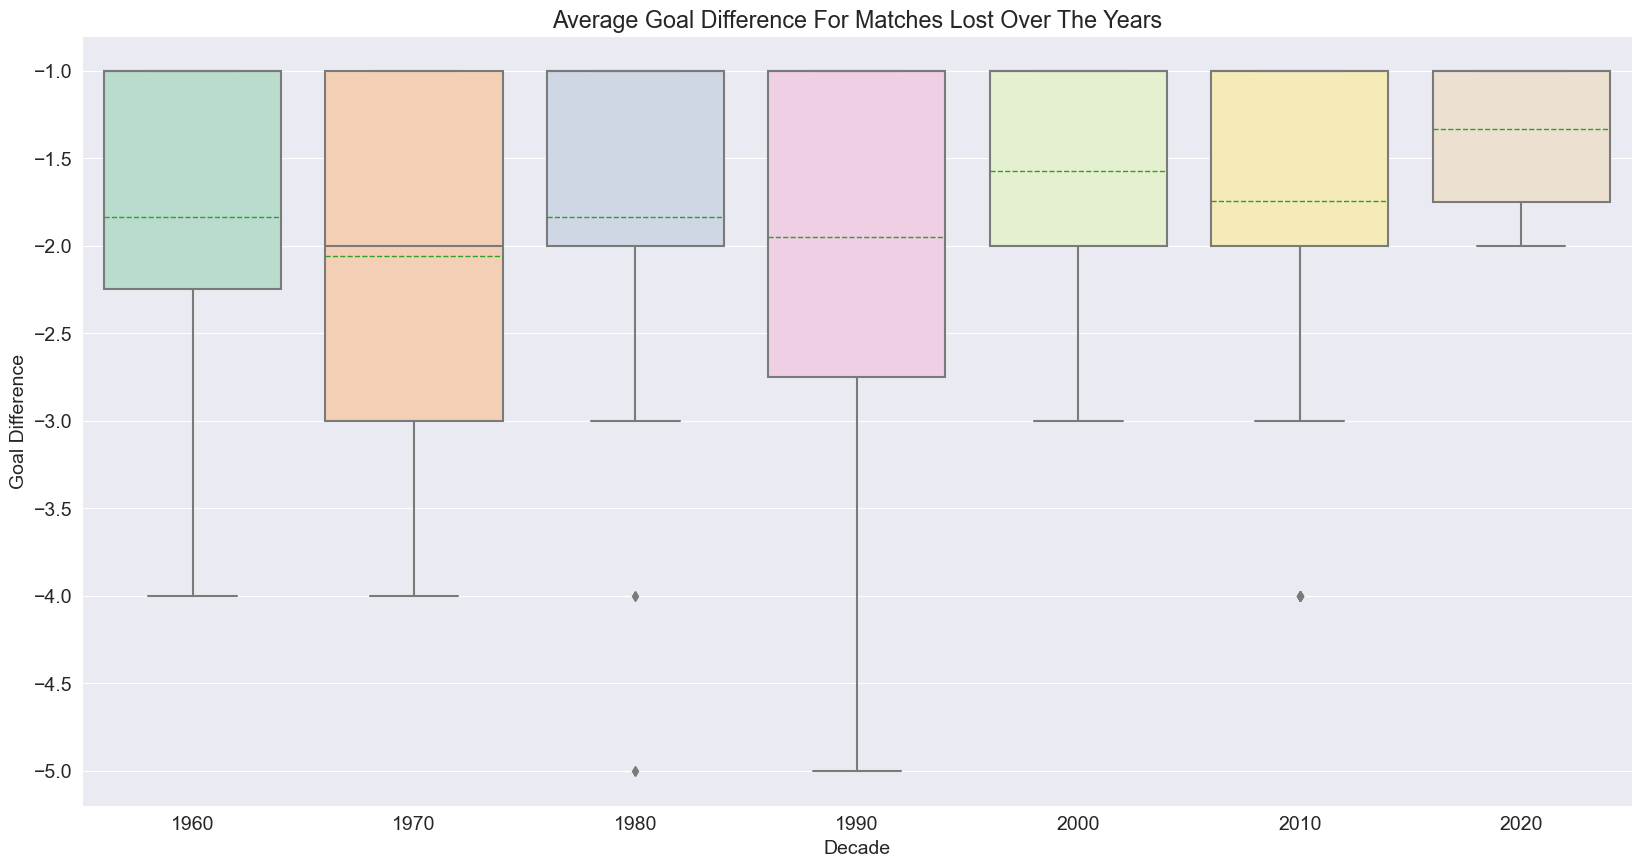

In [34]:
sns.boxplot(x="Decade",
            y="Goal Difference",
            data=matches_lost,
            showmeans=True,
            meanline=True,
            palette="Pastel2")
plt.title("Average Goal Difference For Matches Lost Over The Years")


Cameroon on average losses its matches with a difference of below 2, with most lost matches ending with a goal difference between 1 and 3. This holds true across most decades except the 60s, 70s, 90s where Cameroon has lost a few matches with a goal difference of more than 3.


In [35]:
matches_lost[matches_lost["Goal Difference"] ==
             matches_lost["Goal Difference"].min()]


,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1984-10-04,0,5,-5,South Korea,Friendly,Away,Lost,1984,1980
1990-10-31,1,6,-5,Norway,Friendly,Away,Lost,1990,1990
1994-06-28,1,6,-5,Russia,FIFA World Cup,Away,Lost,1994,1990
1997-03-09,0,5,-5,Costa Rica,Friendly,Away,Lost,1997,1990


For the matches lost, the highest goal difference was 4. This happenned 5 times in 1984, 1990, 1994 and 1997 in matches against South Korea, Norway, Russia and Costa Rica respectively.


### **Number of participations per tournament** <a class="3lvl-anchor" id="3-lvl3-bullet"></a>


We wil start by filtering out friendly matches and tournament qualification rounds from the tournament list.


In [36]:
excluded = [
    "Friendly", "African Cup of Nations qualification",
    "FIFA World Cup qualification"
]

cm_tournament = cm_results[cm_results.Tournament.apply(
    lambda x: False if x in excluded else True)]
cm_tournament_df = cm_tournament.groupby(["Tournament", "Year"]).first()

tournaments = cm_tournament_df.index.get_level_values(0).unique()

In [37]:
data = []
for tournament in tournaments:
    count = cm_tournament_df.Date[cm_tournament_df.index.get_level_values(0) ==
                                  tournament].count()
    data.append(count)

number_participations = pd.Series(data, index=tournaments).sort_index()

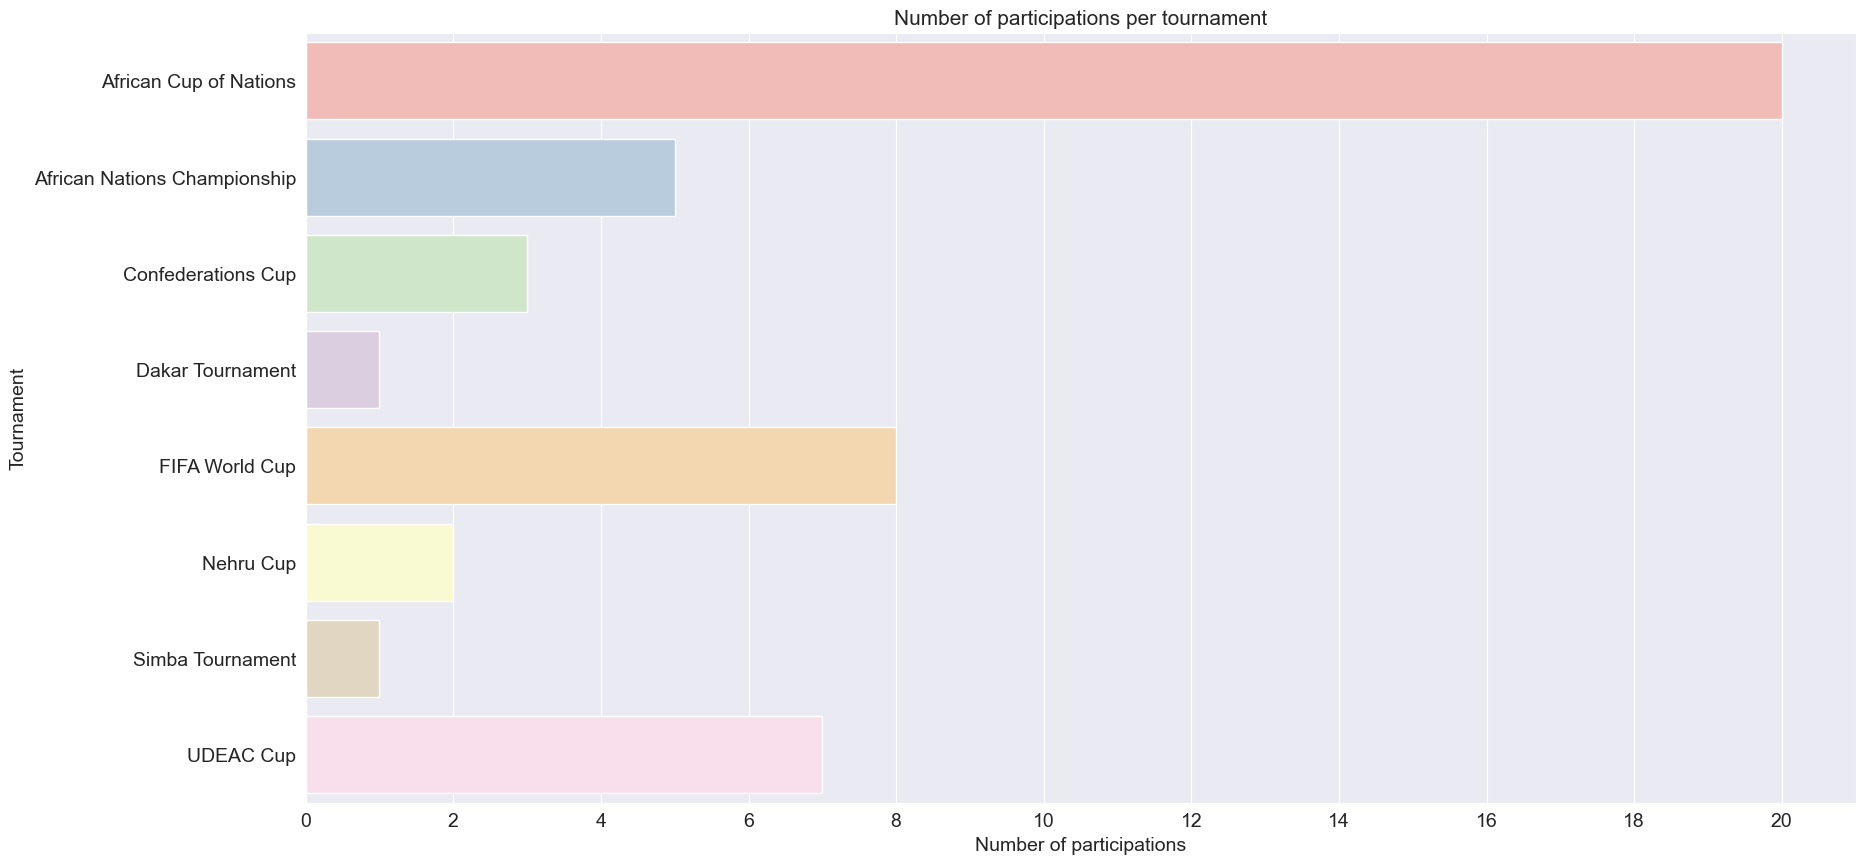

In [38]:
sns.barplot(x=number_participations,
            y=number_participations.index,
            palette="Pastel1")
plt.title('Number of participations per tournament', size=15)
plt.xticks([i for i in range(0, max(data) + 1, 2)])
plt.xlabel("Number of participations")


In total Cameroon participated in 47 competitions with 20 of them being an African Cup of Nations and 8 a FIFA World Cup


**The Nehru Cup** was an international association football tournament organised by the All India Football Federation (AIFF), named after the first Prime Minister of India, Jawaharlal Nehru. It was launched in 1982, but was not held from 1998 to 2006. After the trophy was won by Iraq in 1997, it was reinstated only in 2007 before officially being held last in 2012 and was replaced in 2017.

Tournaments like the confederations cup, UDEAC cup etc were canceled.


### **How many matches were played per tournament?** <a class="3lvl-anchor" id="4-lvl3-bullet"></a>


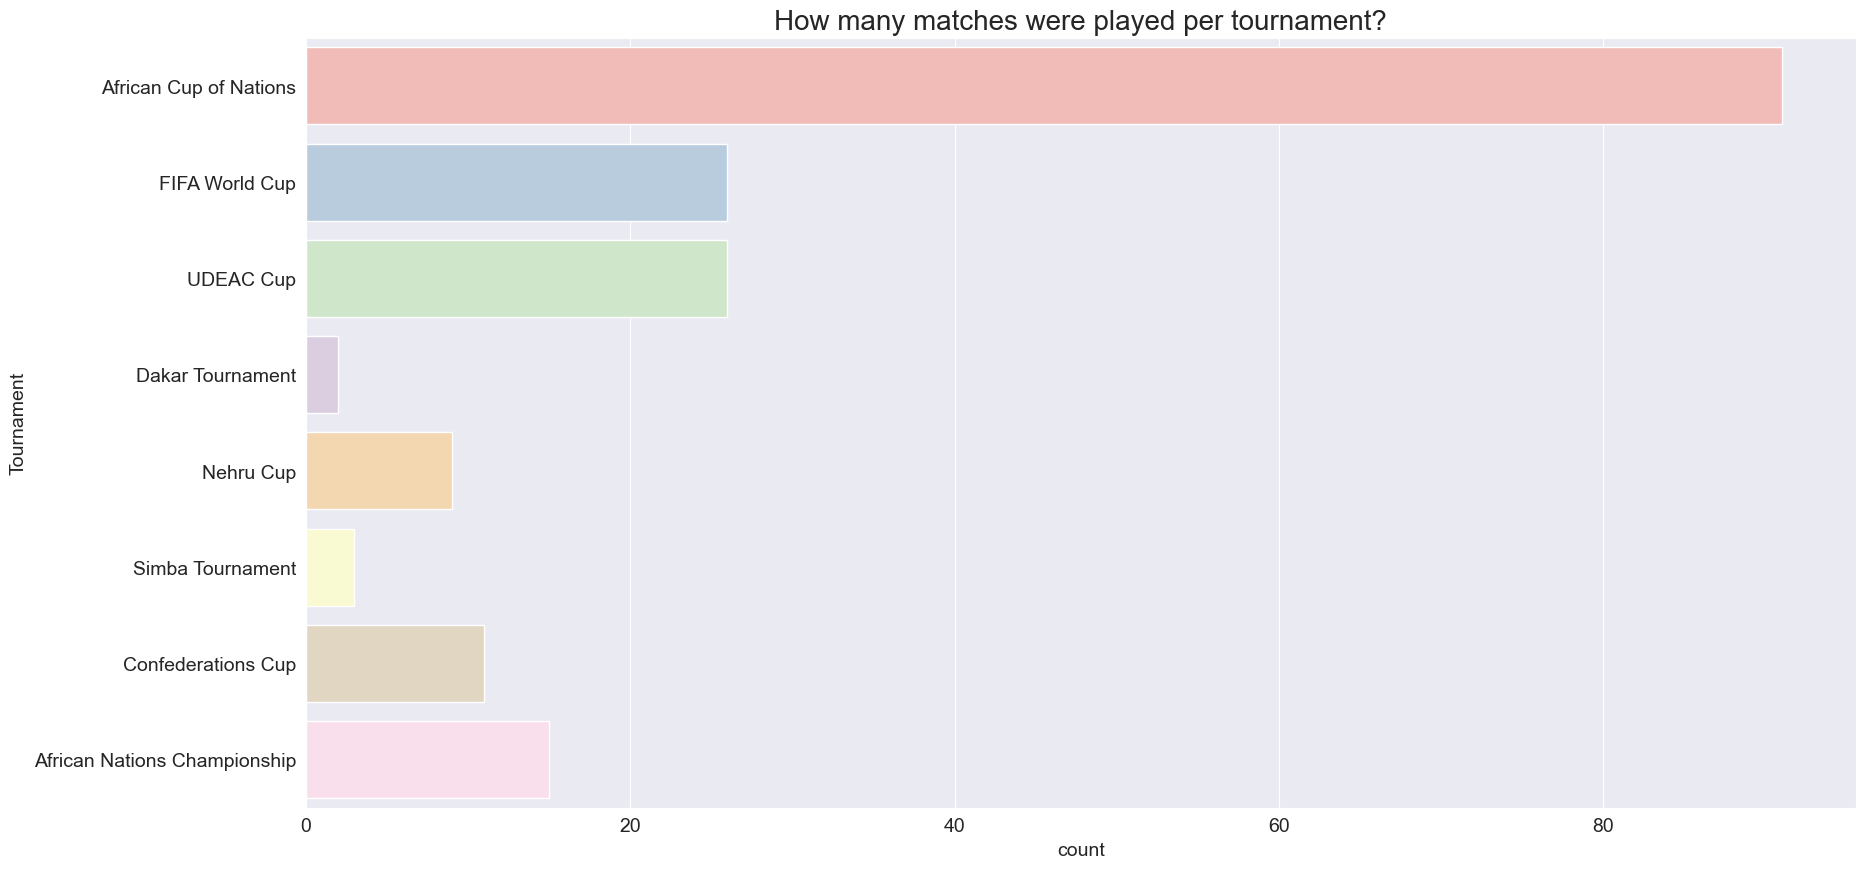

In [39]:
sns.countplot(y=cm_tournament.Tournament.sort_index(), palette="Pastel1")
plt.title("How many matches were played per tournament?", size=20)


A majority of tournament matches played by Cameroon are from the African Cup of Nations with a whapping 50% of overall competition matches, followed by the FIFA world Cup and the UDEAC Cup averaging about 15% each. This can be explained by the following facts;

- The African cup of Nations is hosted more frequently than the FIFA World Cup
- Cameroon participated in more African Cup of Nations than any other tournament.
- Other competitions like the UDEAC Cup, the Daka Tournament and Conferations Cup were terminated (are no longer hosted)


### **Number of finals played per tournament** <a class="3lvl-anchor" id="6-lvl3-bullet"></a>


In [40]:
cm_tournaments = results[results.Tournament.apply(
    lambda x: True if x in tournaments else False)]


We need to remove the Dakar tournament and Nehru Cup as they where point based tournaments and had no final rounds.


In [41]:
finals = cm_tournaments.groupby(["Tournament", "Year"]).last()
cm_finals = finals[(finals["Home Team"] == "Cameroon") | (finals["Away Team"] == "Cameroon") \
                   & (finals.index.get_level_values(0) != "Dakar Tournament")]
cm_finals = cm_finals[
    (cm_finals.index.get_level_values(0) != "Nehru Cup")
    & (cm_finals.index.get_level_values(0) != "African Nations Championship") &
    (cm_finals.index.get_level_values(0) != "Simba Tournament")]
finals_played = cm_finals.index.get_level_values(0).value_counts()

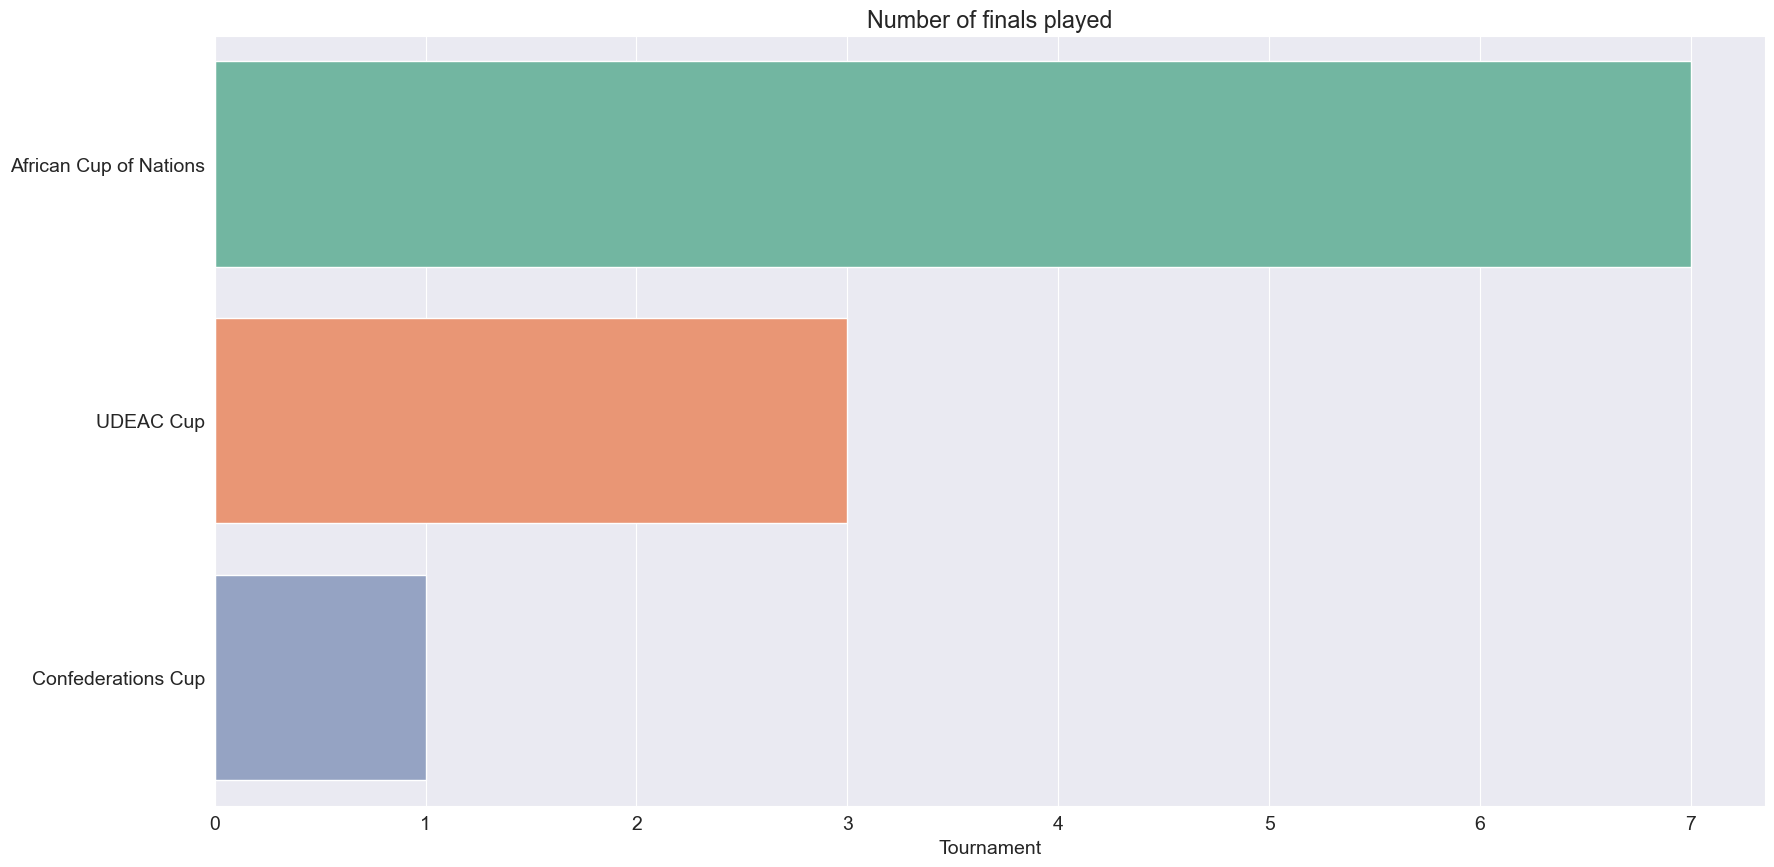

In [42]:
sns.barplot(x=finals_played, y=finals_played.index, palette="Set2")
plt.title("Number of finals played")


For it 20 participations in at the African cup of Nations Cameroon reached the final rounds 7 times. Sadly the Cameroonian Team has yet to play a FIFA World Cup Finals. Its best FIFA World Cup performance ended at the quater final rounds in the 1990, becoming the first African Team to reach the FIFA World Cup quater finals. we can check the years when cameroon participated in the finals.

Cameroon equally played a Confederations Cup final against France in 2002.


### **How many tournaments did Cameroon win?** <a class="3lvl-anchor" id="7-lvl3-bullet"></a>


In [43]:
tournaments_won = cm_finals[(
    cm_finals.Winner == "Cameroon")].index.get_level_values(0)
tournaments_won = tournaments_won.value_counts()

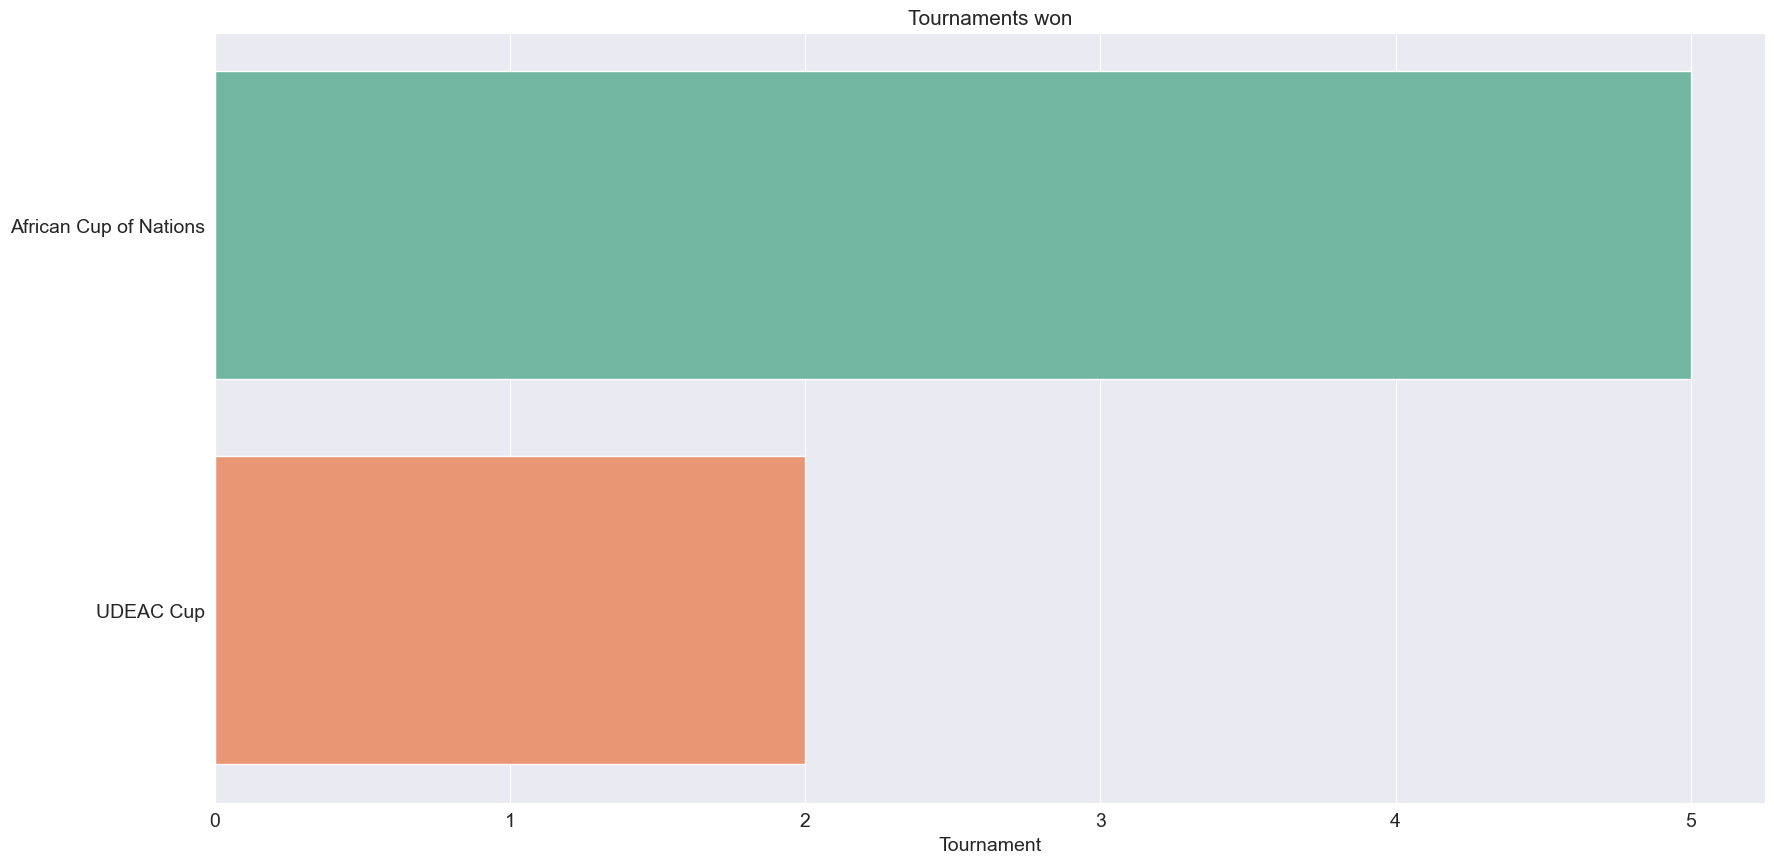

In [44]:
sns.barplot(x=tournaments_won, y=tournaments_won.index, palette="Set2")
plt.title("Tournaments won", size=15)


The Cameroonian National Team so far has won 7 tournament titles from 2 tounaments, with 5 African Cup of Nations and 2 UDEAC Cups.


## **Cameroon and the African Cup of Nations (AFCON)**


As seen above, Cameroon was qualified for the African Cup of Nations 20 times in its football history from 1960 to 2022. Its first AFCON participation was in 1970 where they eleminated at the group stage of the competition. Their last participation was in 2022.


#### **Number of AFCONs hosted by Cameroon.**


In [45]:
first_match = afcon.groupby(["Year"]).first()
first_match[first_match.Country == "Cameroon"]

,Date,Home Team,Home Score,Away Score,Away Team,Tournament,City,Country,Neutral,Shootouts,Outcome,Winner,Loser,Decade,Month,Day,Match Month,Week Day
Year,,,,,,,,,,,,,,,,,,
1972,1972-02-23,Cameroon,2,1,Kenya,African Cup of Nations,Yaoundé,Cameroon,False,False,H,Cameroon,Kenya,1970,2,23,February,Wednesday
2022,2022-01-09,Cameroon,2,1,Burkina Faso,African Cup of Nations,Yaoundé,Cameroon,False,False,H,Cameroon,Burkina Faso,2020,1,9,January,Sunday


Cameroon has hosted the African Cup of the Nations twice. Once in 1970 and the other in 2022


#### **Number of matches played per participation**


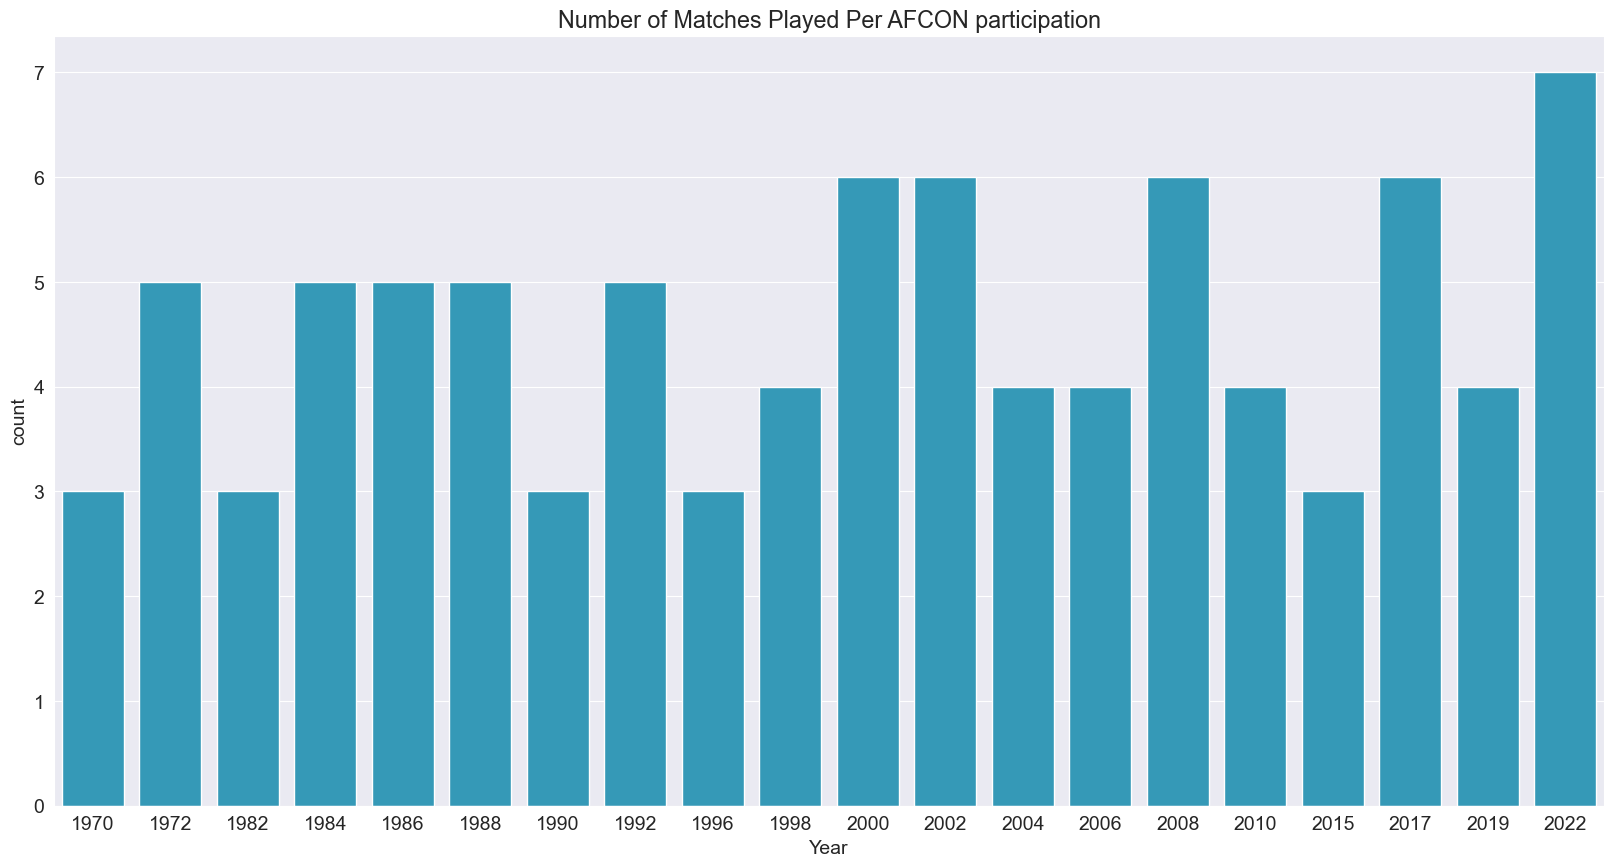

In [46]:
afcon_participations = cm_results[cm_results.Tournament ==
                                  "African Cup of Nations"]
sns.countplot(x=afcon_participations.Year, color="#1fa5cd")
plt.title("Number of Matches Played Per AFCON participation")


#### **Number of Goals scored per participation**


In [47]:
afcon_goals_per_year = goals_df[goals_df.index.isin(afcon_participations.Date)]
afcon_goals_per_year = afcon_goals_per_year.groupby("Year").sum(
    numeric_only=True)


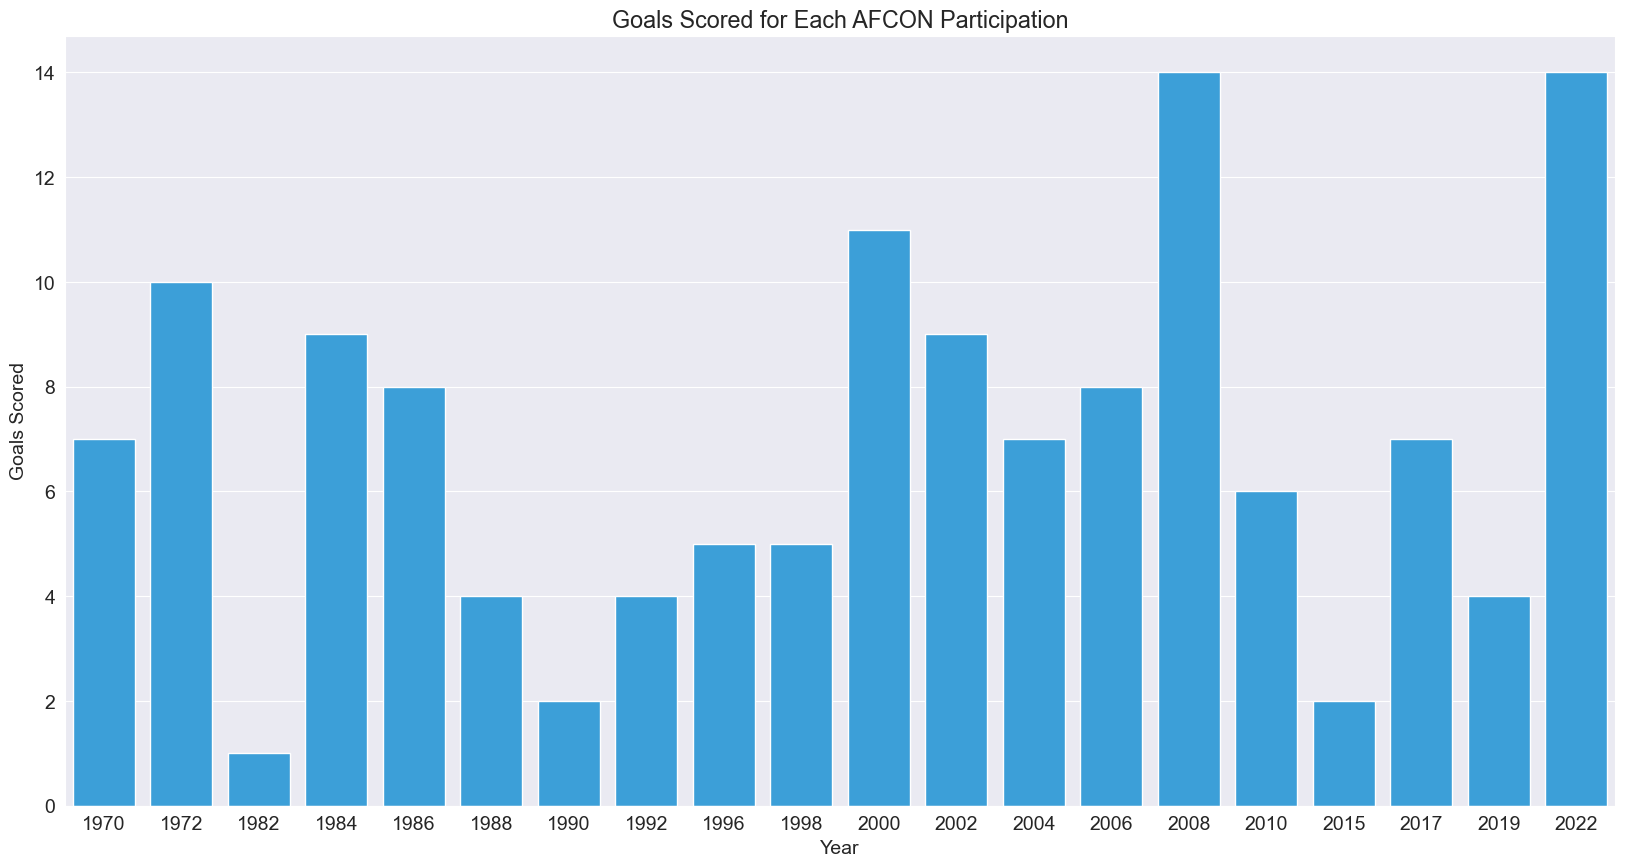

In [48]:
afcon_participation_years = afcon_goals_per_year.index
sns.barplot(y="Goals Scored",
            x=afcon_participation_years,
            data=afcon_goals_per_year,
            color="#22a6f2")
plt.title("Goals Scored for Each AFCON Participation")


#### **Goals Conceded Per participation**


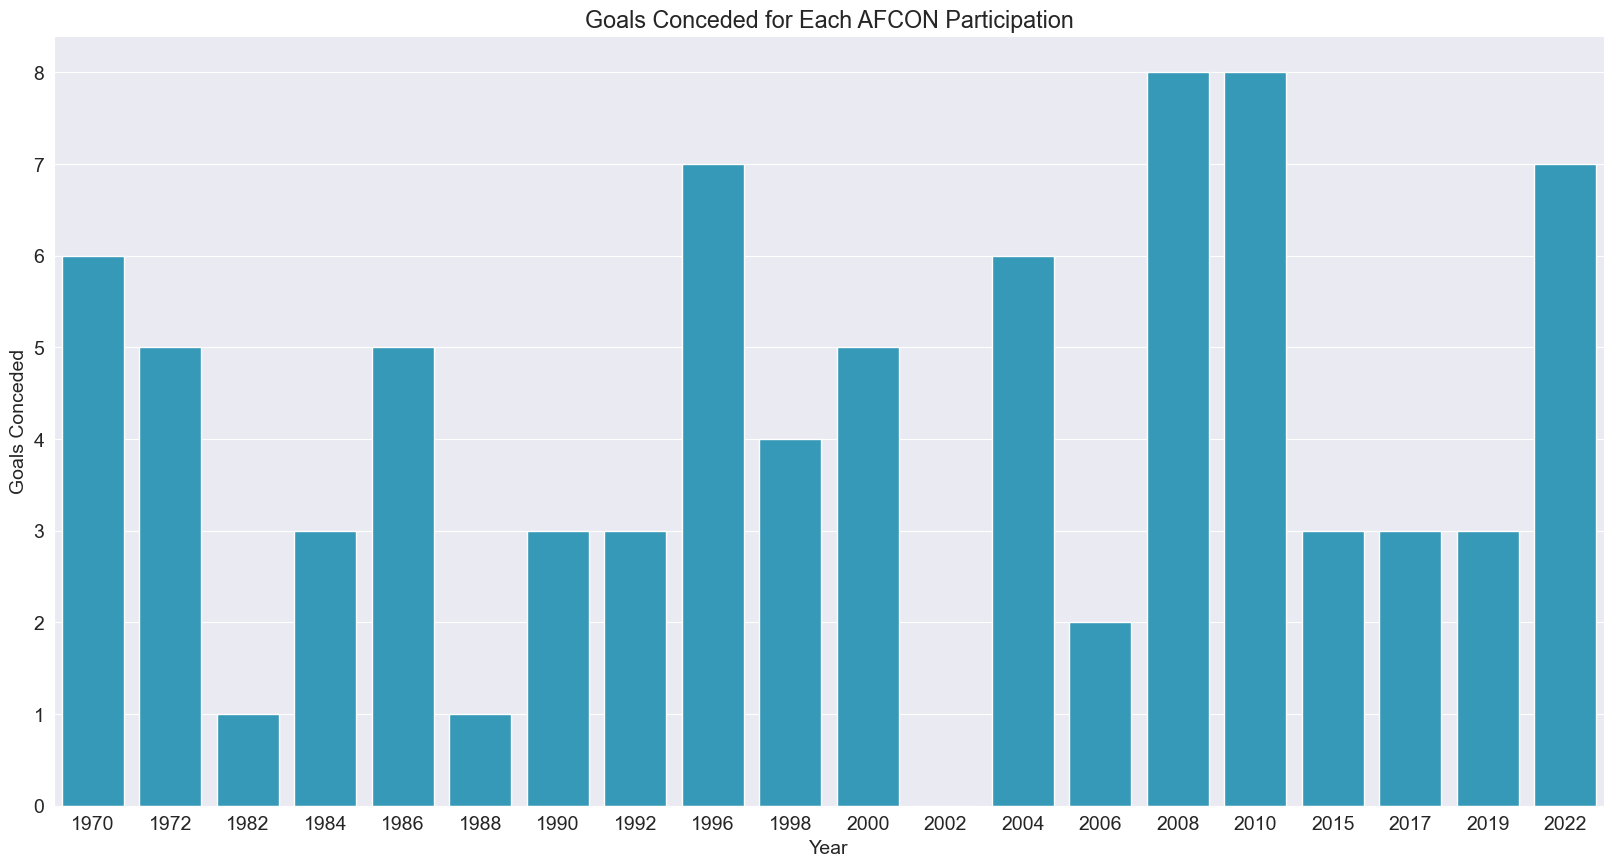

In [49]:
sns.barplot(y="Goals Conceded",
            x=afcon_participation_years,
            data=afcon_goals_per_year,
            color="#1fa5cd")
plt.title("Goals Conceded for Each AFCON Participation")


In [50]:
goals_df[(goals_df.Tournament == "African Cup of Nations")
         & (goals_df.Opponent == "Ivory Coast")]


,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1970-02-06,3,2,1,Ivory Coast,African Cup of Nations,Home,Won,1970,1970
1984-03-10,2,0,2,Ivory Coast,African Cup of Nations,Away,Won,1984,1980
1986-03-17,1,0,1,Ivory Coast,African Cup of Nations,Home,Won,1986,1980
1992-01-23,0,0,0,Ivory Coast,African Cup of Nations,Home,Draw,1992,1990
2000-01-28,3,0,3,Ivory Coast,African Cup of Nations,Home,Won,2000,2000
2002-01-25,1,0,1,Ivory Coast,African Cup of Nations,Home,Won,2002,2000
2006-02-04,1,1,0,Ivory Coast,African Cup of Nations,Home,Draw,2006,2000
2015-01-28,0,1,-1,Ivory Coast,African Cup of Nations,Home,Lost,2015,2010


### **Match outcomes at AFCON**


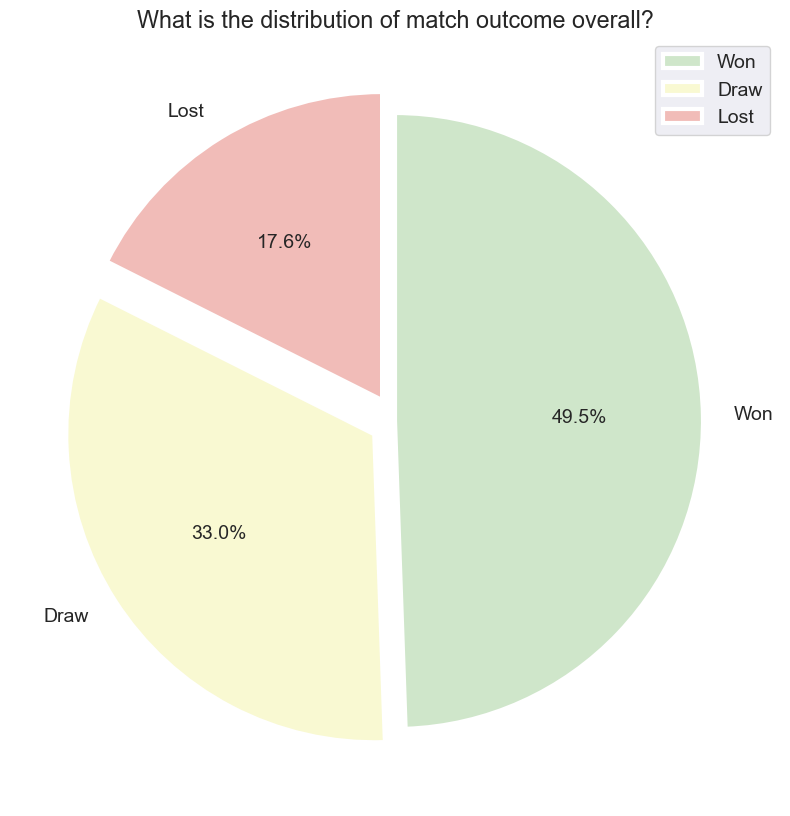

In [51]:
afcon_outcome_df = goals_df[goals_df.Tournament ==
                            "African Cup of Nations"].Outcome.value_counts()
explode2 = [0, 0.08, 0.08]
plt.pie(x=afcon_outcome_df,
        autopct="%1.1f%%",
        startangle=90,
        labels=afcon_outcome_df.index,
        colors=pie_color,
        wedgeprops={"linewidth": 3},
        counterclock=False,
        explode=explode2)

plt.title("What is the distribution of match outcome overall?")
plt.legend(cm_win_loss.index)


With the graph above we can assume that is one the best performing teams in the AFCON


### **Cameroon at AFCON Finals**


As seen above Cameroon has participated at 7 AFCON finals and won 5 of them. Lets check the data on these finals


In [52]:
cm_finals[cm_finals.index.get_level_values(0) ==
          "African Cup of Nations"].loc[:, "Date":"Outcome"]


Date Home Team  Home Score  Away Score  \
Tournament             Year                                                
African Cup of Nations 1984 1984-03-18  Cameroon           3           1   
                       1986 1986-03-21     Egypt           0           0   
                       1988 1988-03-27  Cameroon           1           0   
                       2000 2000-02-13   Nigeria           2           2   
                       2002 2002-02-10   Senegal           0           0   
                       2008 2008-02-10  Cameroon           0           1   
                       2017 2017-02-05     Egypt           1           2   

                            Away Team        City      Country  Neutral  \
Tournament             Year                                               
African Cup of Nations 1984   Nigeria     Abidjan  Ivory Coast     True   
                       1986  Cameroon       Cairo        Egypt    False   
                       1988   Nigeria  Casablanca      Morocco     True   
                       2000  Cameroon       Lagos      Nigeria    False   
                       2002  Cameroon      Bamako         Mali     True   
                       2008     Egypt       Accra        Ghana     True   
                       2017  Cameroon  Libreville        Gabon     True   

                             Shootouts Outcome  
Tournament             Year                     
African Cup of Nations 1984      False       H  
                       1986       True       D  
                       1988      False       H  
                       2000       True       D  
                       2002       True       D  
                       2008      False       A  
                       2017      False       A

Cameroon got the finals of the AFCON in 1984, 1986, 1988, 2000, 2002, 2008, 2017 and in 1984, 1988, 2000, 2002, 2017.


## **Cameroon and The FIFA World Cup (FWC)**


As seen above, Cameroon has succesfully qualified for 8 FIFA World Cups but has never been able to reach the semi-finals let the alone the finals.


In [53]:
fwc_goals_df = goals_df[goals_df.Tournament == "FIFA World Cup"]
fwc_goals_df.head(1)

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1982-06-15,0,0,0,Peru,FIFA World Cup,Away,Draw,1982,1980


Cameroon first participated at a FIFA World Cup hosted by Spain in 1982. The team played its first match was against Peru and ended as a draw with no goals scored.


In [54]:
print('Matches Played: ', fwc_goals_df.Outcome.count())
print("Years Qualified: ", list(fwc_goals_df.Year.unique()))


Matches Played:  26
Years Qualified:  [1982, 1990, 1994, 1998, 2002, 2010, 2014, 2022]


Cameroon successfully qualified for the 1982, 1990, 1998, 2002, 2010, 2014 and 2022 FWC, making it a total of 8 qualifications. For its 8 participations, Cameroon has played a total of 26 matches giving an average of 3 matches per world cup. This clearly reflects reality as Cameroon has only crossed the group stage once.


It is equally important to note that since its first participation, Cameroon was absent only 3 times from the FWC making it quite the regular client of the tournament. The FWC missed since then where the 1986, 2006 and 2018 FWCs.


### **Matches Played Per Participation**


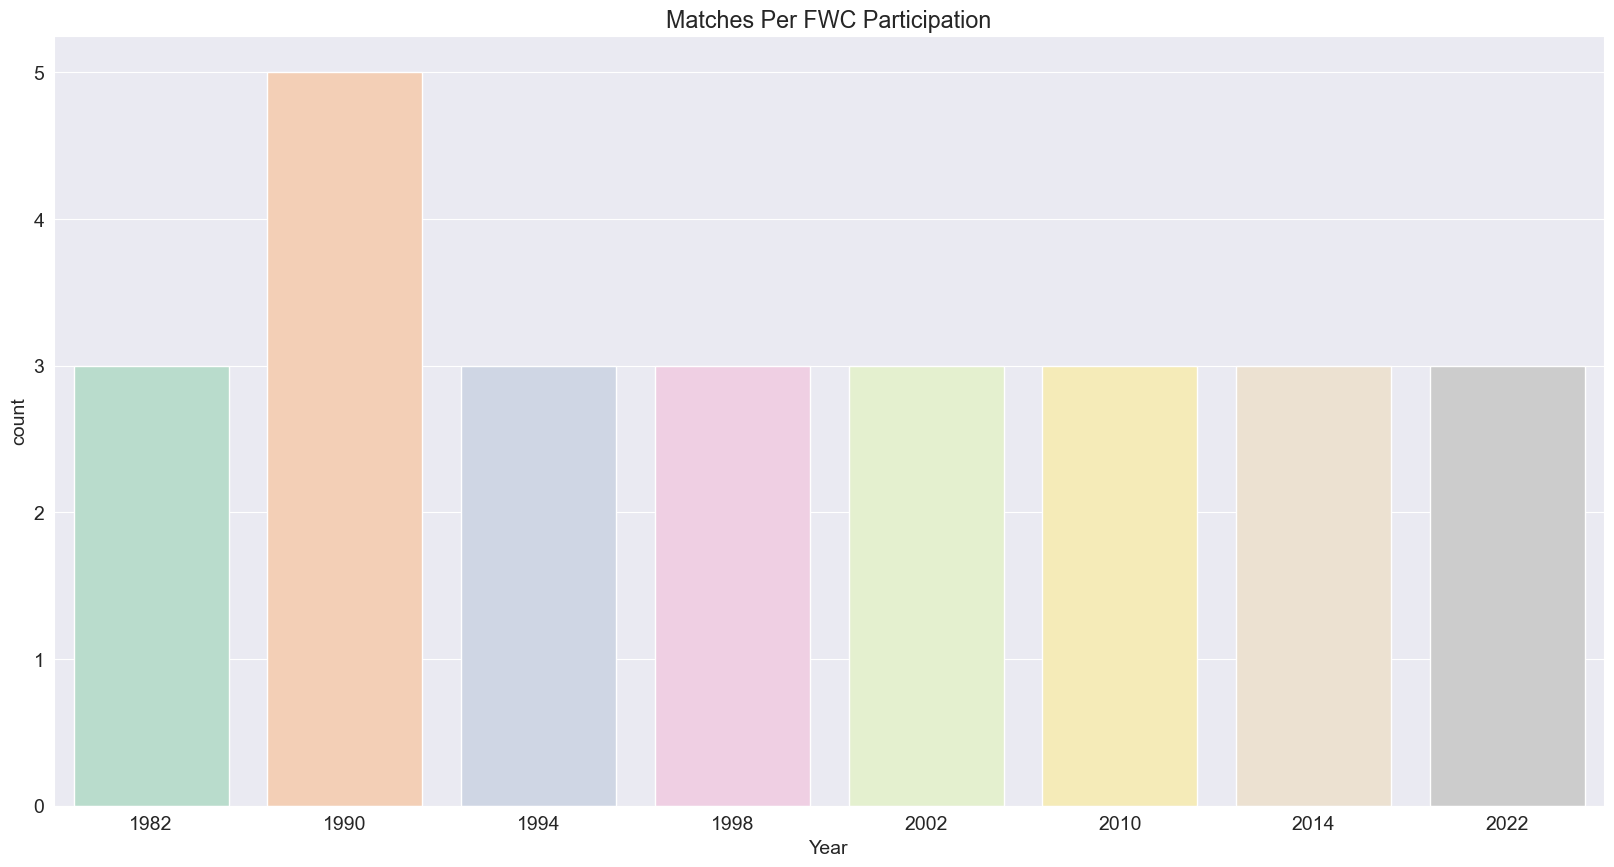

In [55]:
sns.countplot(x=fwc_goals_df.Year, palette="Pastel2")

plt.title("Matches Per FWC Participation")


In [56]:
fwc_goals_df[fwc_goals_df.Year == 1990].tail(1)

,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
1990-07-01,2,3,-1,England,FIFA World Cup,Home,Lost,1990,1990


As shown above Cameroon generally plays 3 matches each time it is qualified for the FWC. The only exception was in 1990 where they successfully crossed the group stages and reached the quarter finals.The quarter final match was played against England, unfortunately, the match ended with the score of 3 - 2 in favor of England marking the elimination of Cameroon. Never the less, this feat made Cameroon the first African Team to reach the quarter finals of the FIFA World Cup. That was an incredible feat for its second qualification.


### **Number of Goals Scored Per FWC**


In [57]:
print(
    'Average Goals Scored: ',
    round(fwc_goals_df["Goals Scored"].sum() /
          fwc_goals_df["Goals Scored"].count()))


Average Goals Scored:  1


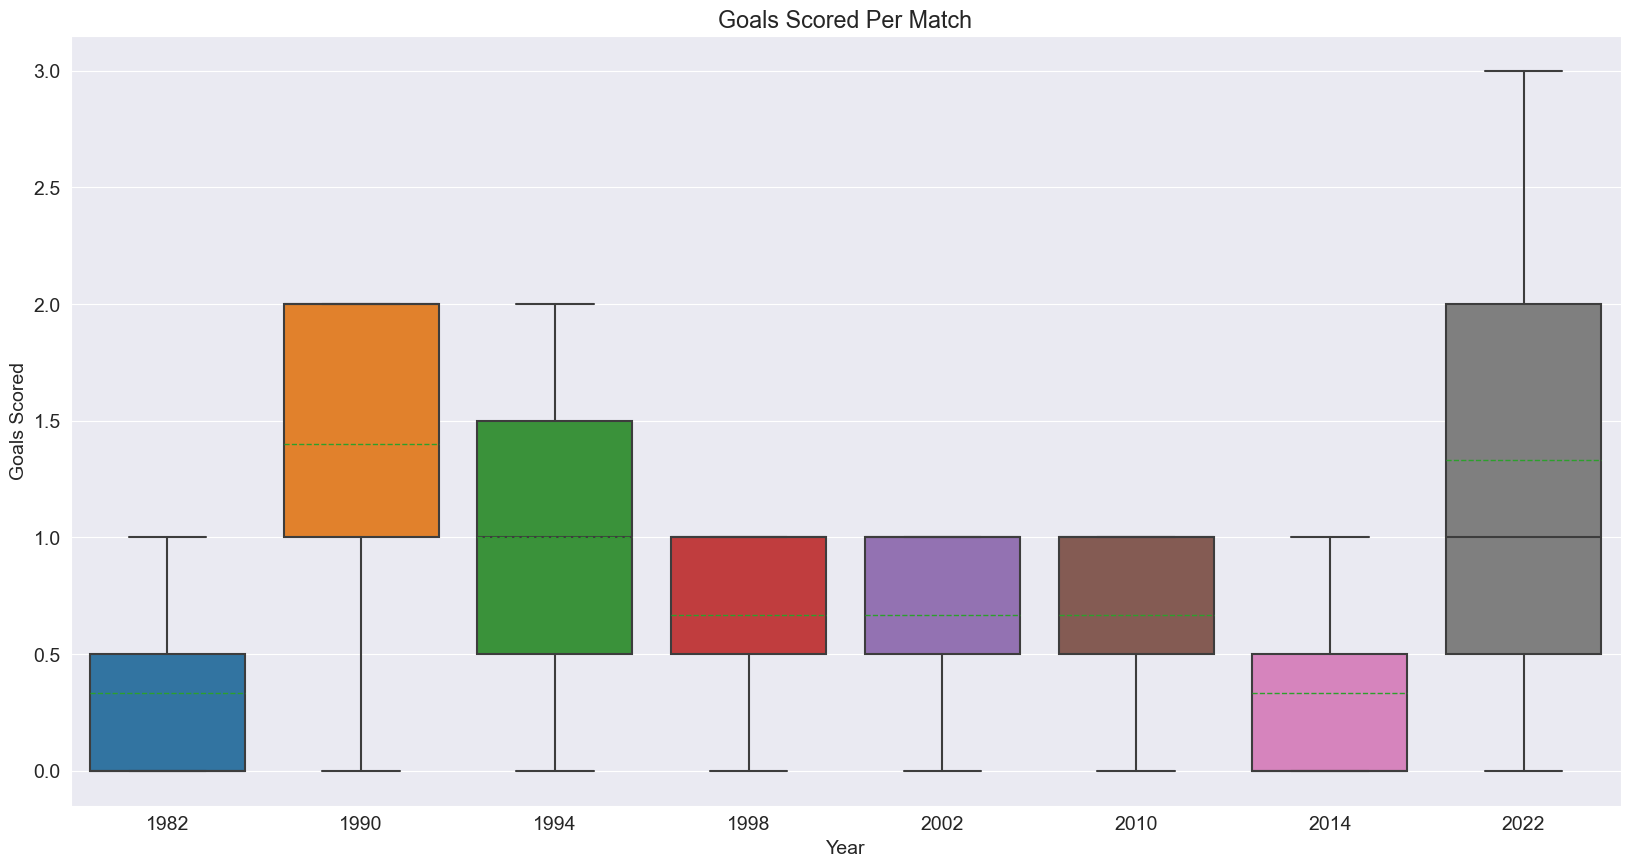

In [58]:
sns.boxplot(y="Goals Scored",
            x="Year",
            data=fwc_goals_df,
            showmeans=True,
            meanline=True)
plt.title("Goals Scored Per Match")


> The doted green line represents the average goals scored per match. </br>
> The horizontal line at the bottom is the minimum while that at the top is the maximum </br>
> The boxes shows the range for 50% of the data.</br>
> The vertical lines show the range for 25% of the data each.
> The line in the boxes is the media (middle value in the data)


In [59]:
fwc_goals_df[fwc_goals_df["Goals Scored"] ==
             fwc_goals_df["Goals Scored"].max()]


,Goals Scored,Goals Conceded,Goal Difference,Opponent,Tournament,Home/Away,Outcome,Year,Decade
Date,,,,,,,,,
2022-11-28,3,3,0,Serbia,FIFA World Cup,Home,Draw,2022,2020


As expected, the best performance in terms of goals was in 1990 where over 3 matches ended up with at least 1 goal scored with a maximum of 2 goals scored. The next best performance seems to be in 2022 where Cameroon was able to score 3 goals in one match with a goal average closer to that of the 1990 FWC.


The highest number of goals scored by the Cameroonian team in a FWC match was 3 in a match against Serbia in the 2022 FIFA World Cup in Qatar


### **Goals Conceded**


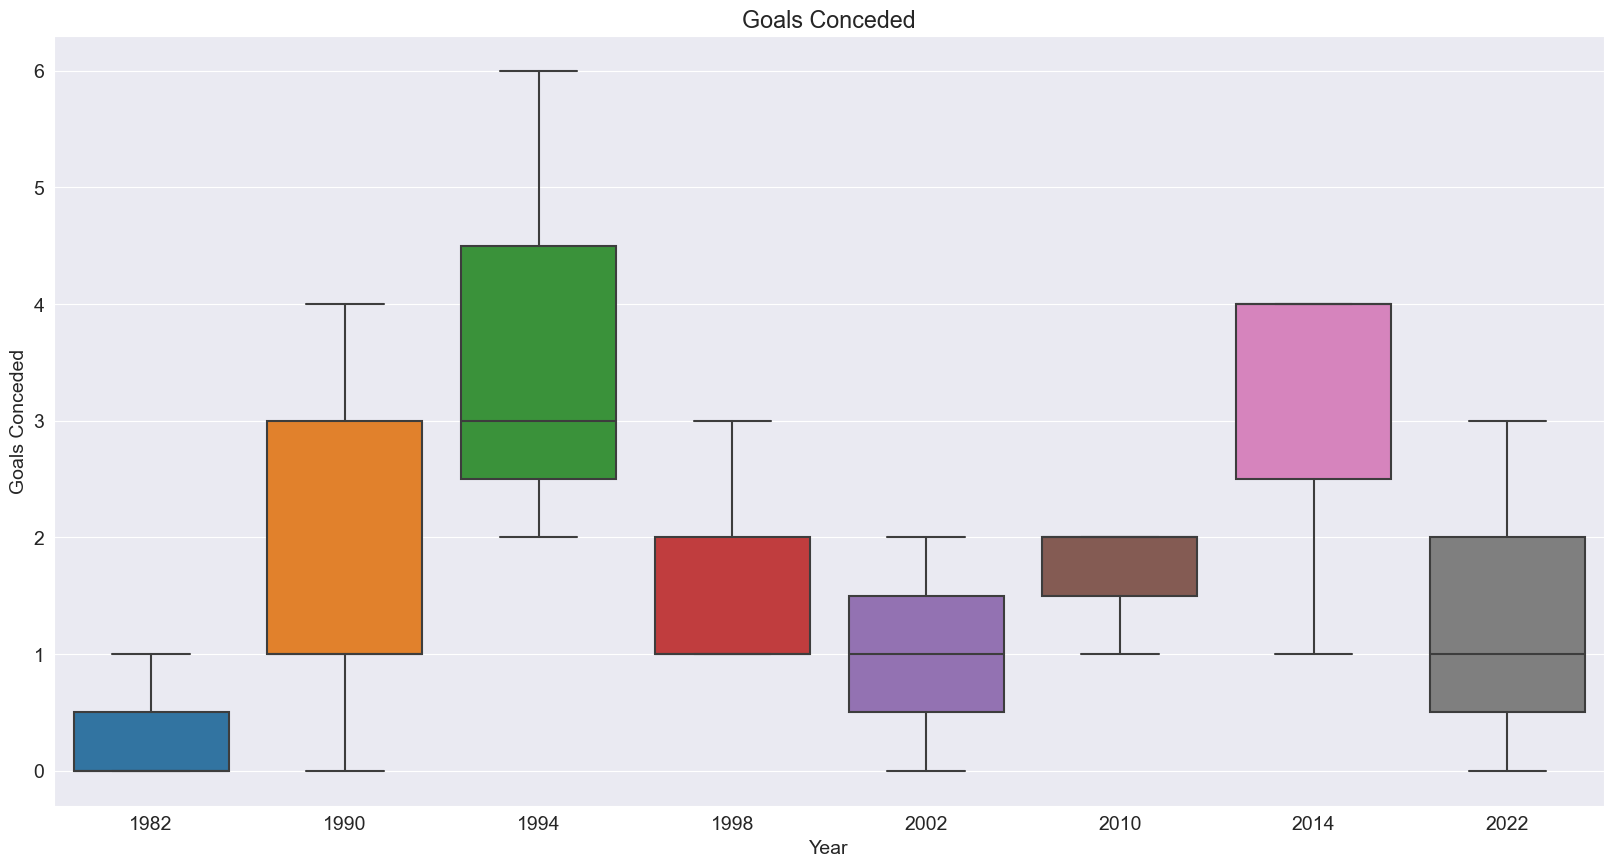

In [60]:
sns.boxplot(x="Year", y="Goals Conceded", data=fwc_goals_df)
plt.title("Goals Conceded")


### **Match Outcome**


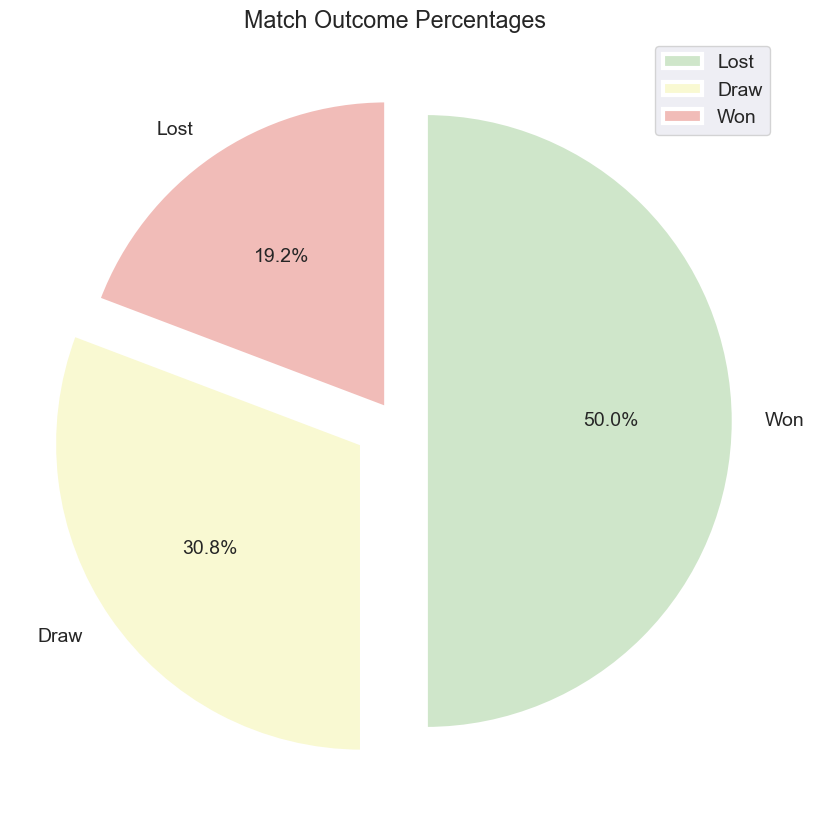

In [61]:
fwc_outcome = fwc_goals_df.Outcome.value_counts()

plt.pie(x=fwc_outcome,
        autopct="%1.1f%%",
        startangle=90,
        labels=cm_win_loss.index,
        colors=pie_color,
        wedgeprops={"linewidth": 3},
        counterclock=False,
        explode=explode)
plt.legend(fwc_outcome.index)
plt.title("Match Outcome Percentages")


Contrary to general performance or at the , at the FWC, Cameroon looses more matches than it win with exactly 50% of its FWC matches lost.


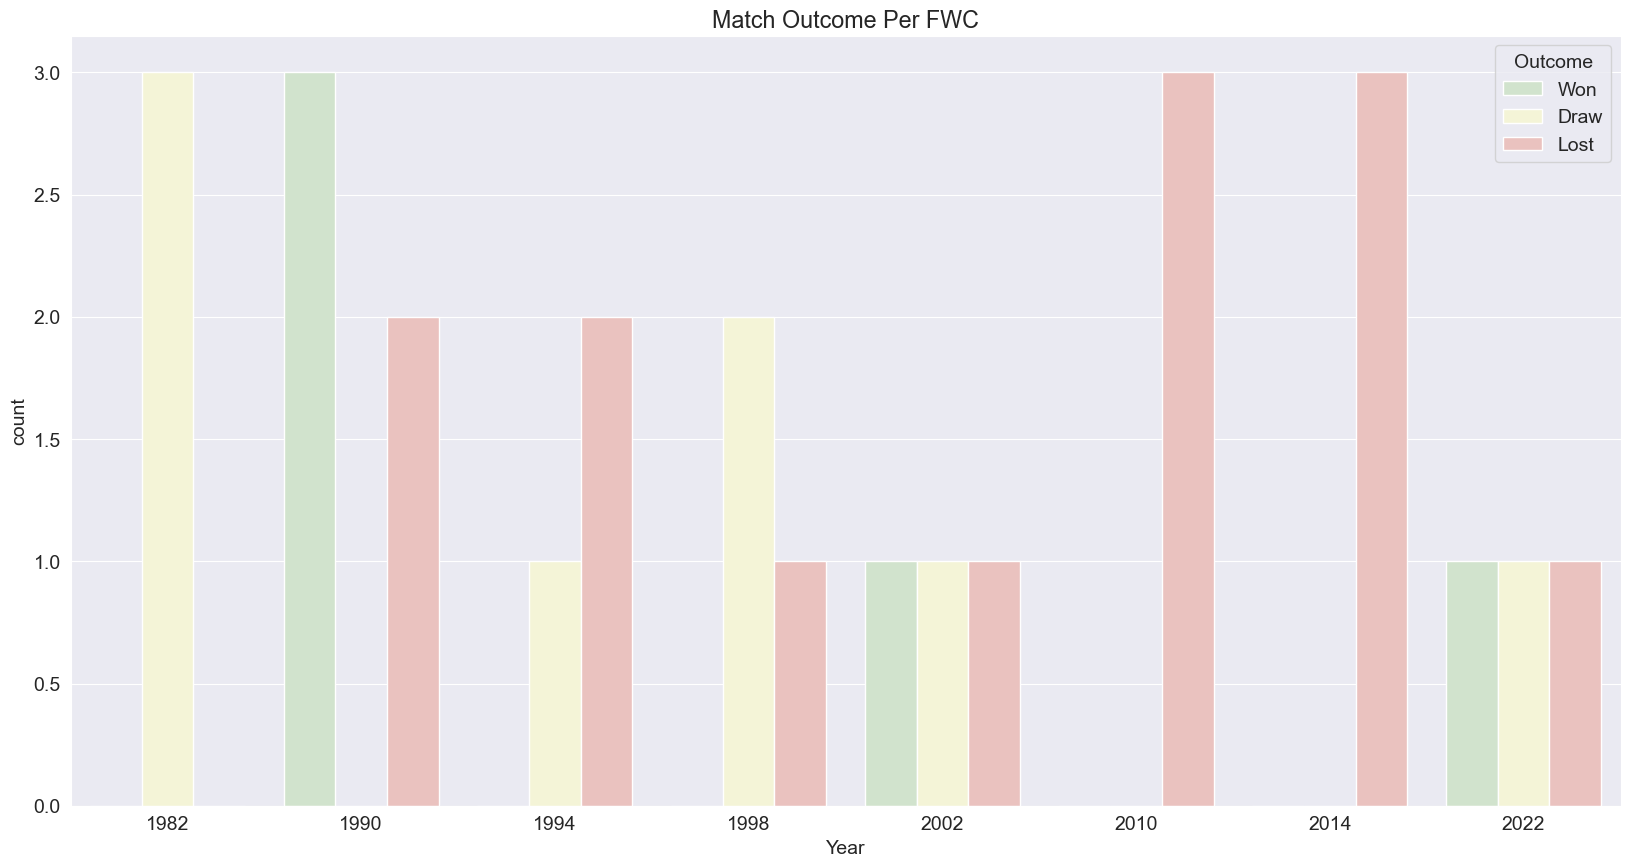

In [93]:
sns.countplot(x="Year", hue="Outcome", data=fwc_goals_df, hue_order=["Won", "Draw", "Lost"], palette=pie_color)
plt.title("Match Outcome Per FWC");

### **Goal Difference**


Lets check the average goal difference for FWC matches won by Cameroon.


In [76]:
fwc_matches_won = fwc_goals_df[fwc_goals_df.Outcome == "Won"]
fwc_matches_lost = fwc_goals_df[fwc_goals_df.Outcome == "Lost"]

print('Average Goal Difference for FWC matches won: ', int(fwc_matches_won["Goal Difference"].mean()))

print('Average Goal Difference for FWC matches lost: ',
      abs(round(fwc_matches_lost["Goal Difference"].mean())))

Average Goal Difference for FWC matches won:  1
Average Goal Difference for FWC matches lost:  2


On average, Cameroon won its FIFA World Cup matches by 1 goal and lost by 2 goals.


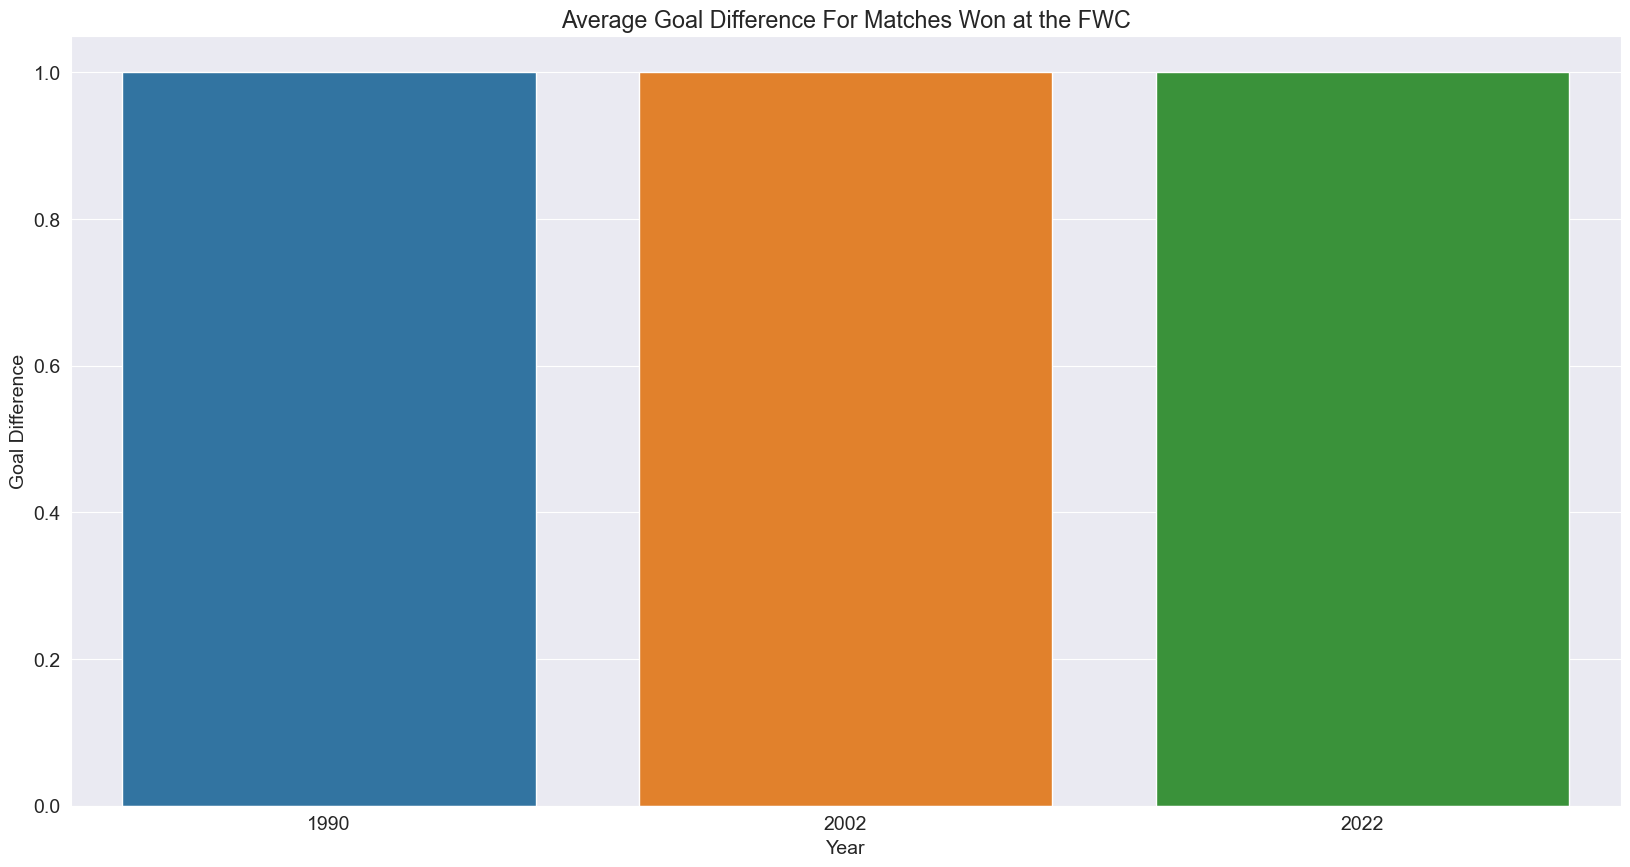

In [82]:
years_won_matches = fwc

sns.lineplot(x="Year", y='Goal Difference', data=fwc_matches_won)
plt.title("Average Goal Difference For Matches Won at the FWC");

<AxesSubplot:xlabel='Year', ylabel='Goal Difference'>

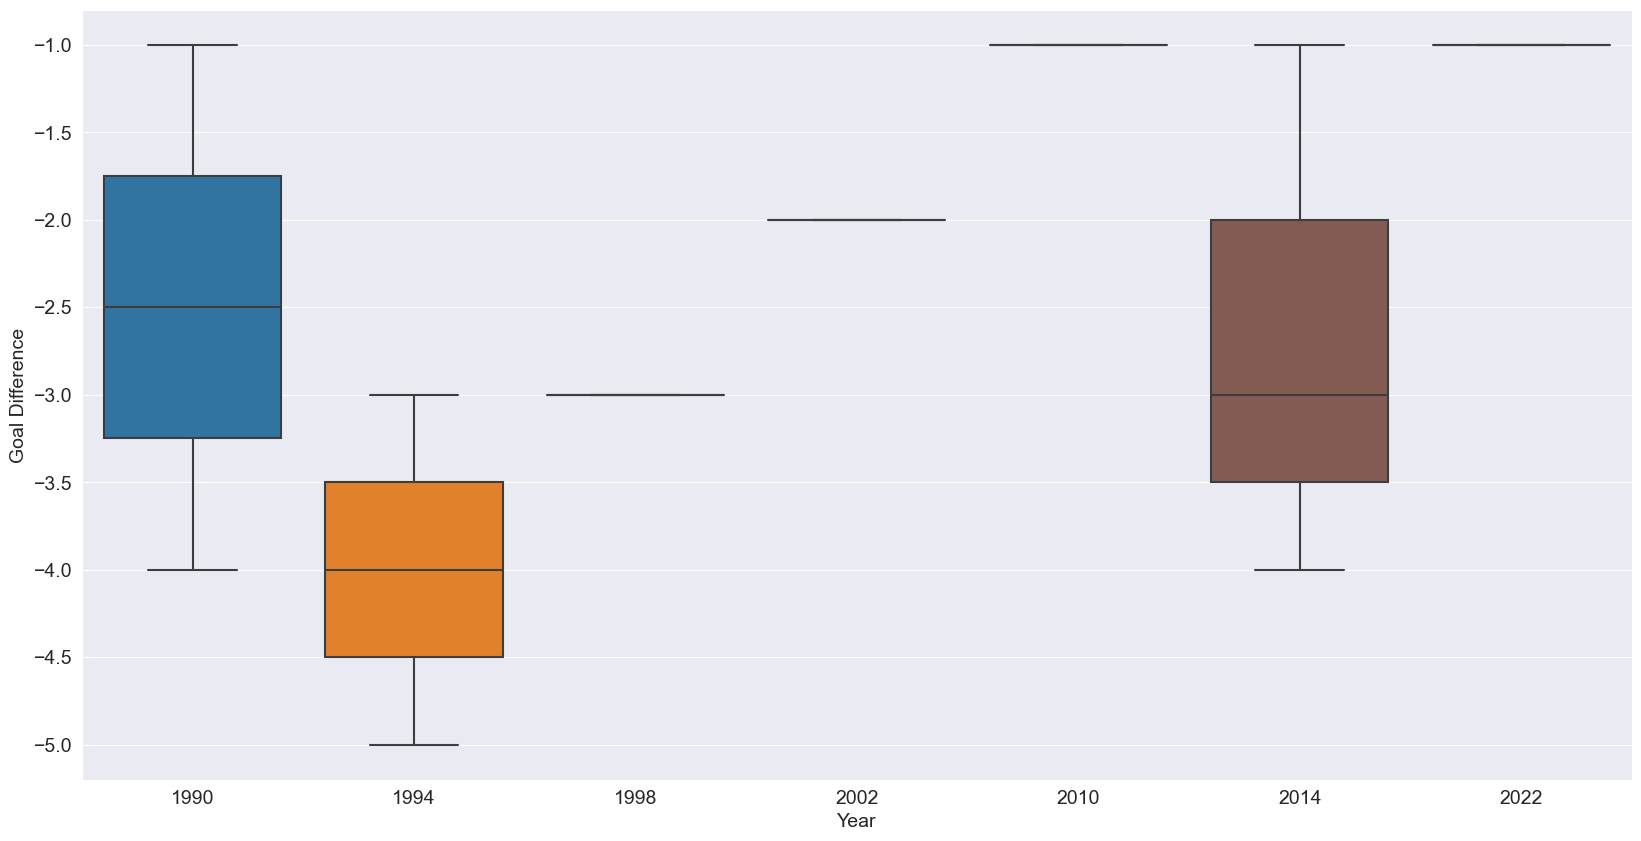

In [83]:
sns.boxplot(x='Year', y="Goal Difference", data=fwc_matches_lost);

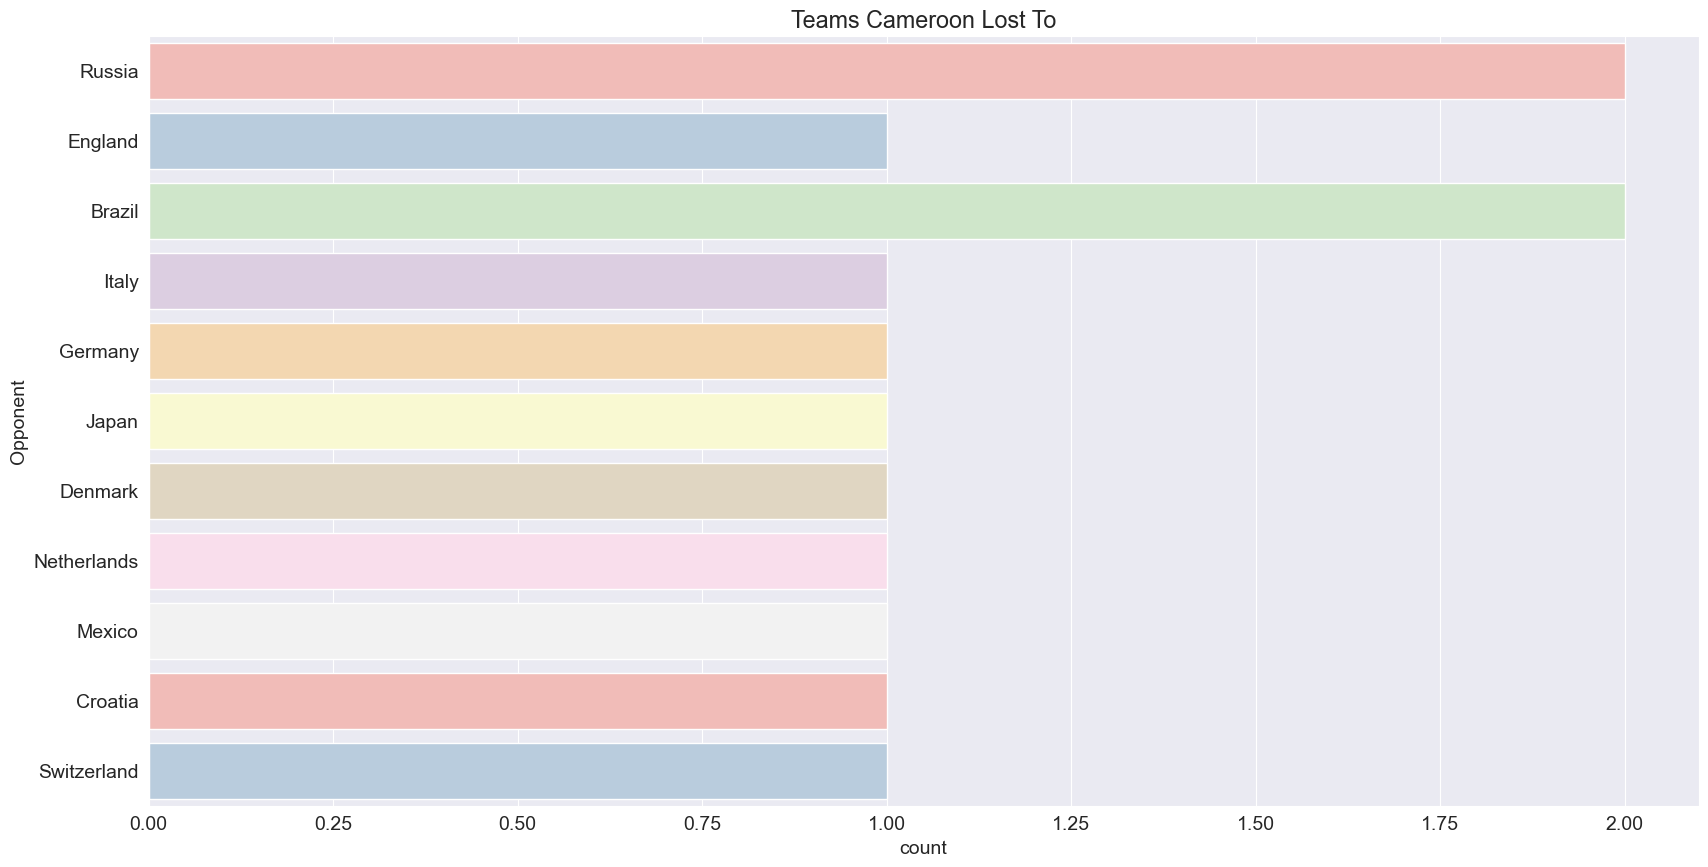

In [108]:
sns.countplot(y="Opponent", data=fwc_matches_lost, palette="Pastel1")
plt.title("Teams Cameroon Lost To");

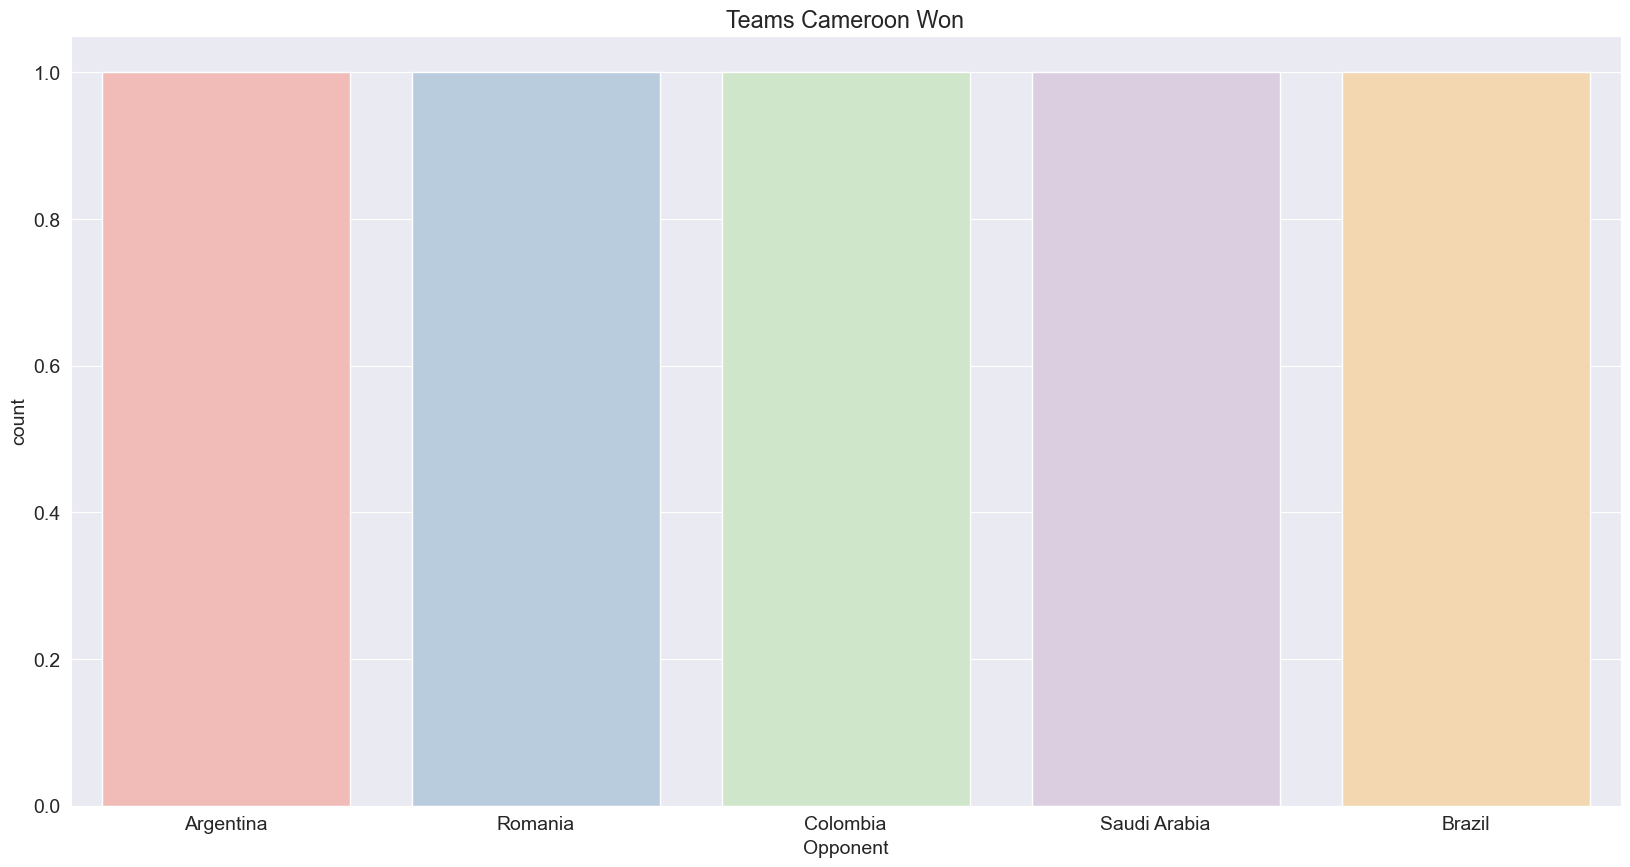

In [106]:
sns.countplot(x="Opponent", data=fwc_matches_won, palette="Pastel1")
plt.title("Teams Cameroon Won");

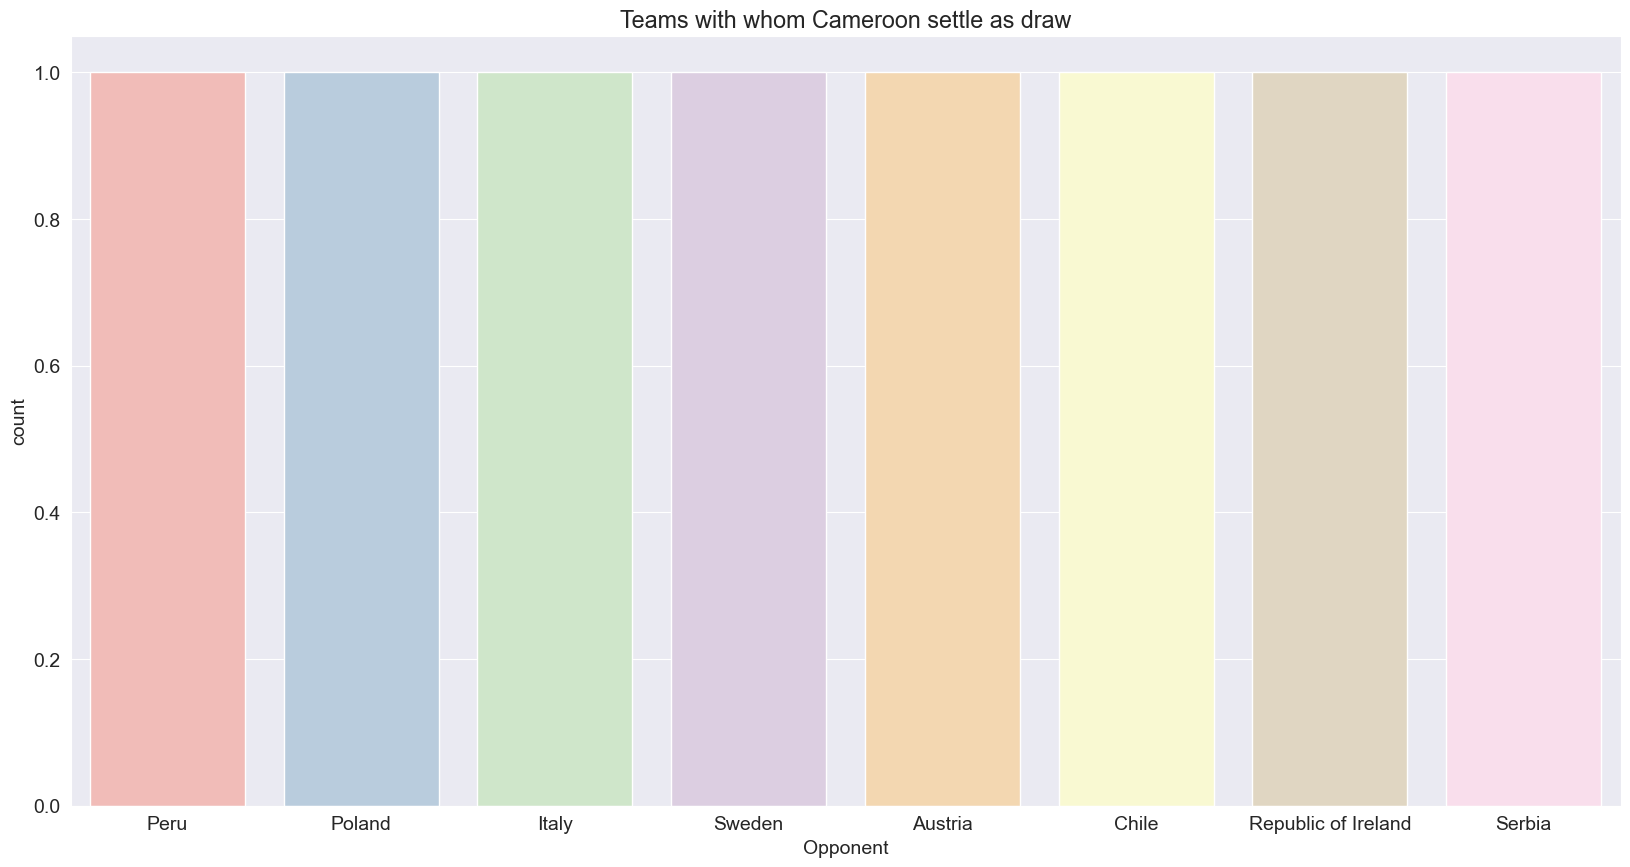

In [110]:
sns.countplot(x="Opponent", data=fwc_goals_df[fwc_goals_df.Outcome == "Draw"], palette="Pastel1")
plt.title("Teams with whom Cameroon settle as draw");


# **Conclusion**


Cameroon has an pretty interesting football history.The team played a total of 576 matches from 1960 to 2022, qualified for 8 FIFA World Cups, 20 African Cup of Nations and other tournaments. They've won a total 7 cups i.e. 5 African Cup of Nations and 2 UDEAC Cups. On average they've won more matches than they've lost and scored more than they've conceded goals. This shows a quite high level of performance for a team that has been around only 43 years.
